In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [3]:
train_data = pd.read_csv('train_dataset.csv')

In [4]:
train_data_salaries = pd.read_csv('train_salaries.csv')

In [5]:
test_data = pd.read_csv('test_dataset.csv')

In [5]:
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [6]:
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [7]:
test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [8]:
train_data['salary'] = train_data_salaries['salary']

In [9]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [11]:
train_data.describe()

yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

In [12]:
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [13]:
print(len(train_data))
len(test_data)

1000000


1000000

In [14]:
train_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [15]:
test_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [16]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [17]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [80]:
train_data = train_data.drop(labels = ['jobId', 'companyId'], axis = 1)
train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[1000000 rows x 7 columns]

In [19]:
train_data['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [20]:
train_data['degree'].value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [21]:
test_data.drop(labels = ['jobId', 'companyId'], axis = 1)

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [22]:
corr = train_data.corr()

In [23]:
corr

yearsExperience  milesFromMetropolis    salary
yearsExperience             1.000000             0.000673  0.375013
milesFromMetropolis         0.000673             1.000000 -0.297666
salary                      0.375013            -0.297666  1.000000

<AxesSubplot:>

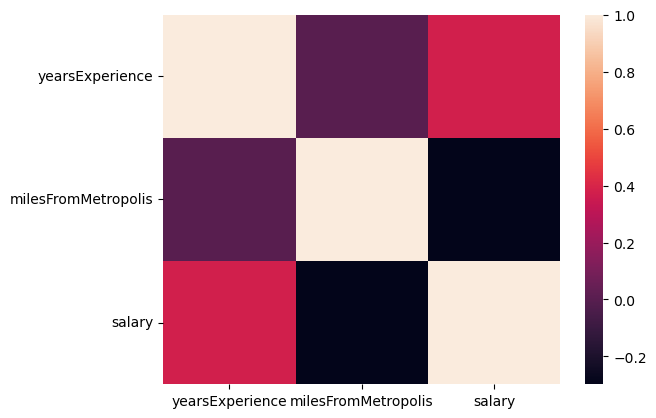

In [24]:
sns.heatmap(corr)

# CHI-SQUARE TEST OF INDEPENDENCE

In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [26]:
def perform_chi_square_test(var_1, var_2):
    dataset_table = pd.crosstab(var_1, var_2)
    observed_values = dataset_table.values
    contingency_table = stats.chi2_contingency(dataset_table)
    expected_values = contingency_table[3]
    no_of_rows = len(dataset_table)
    no_of_columns = len(dataset_table.columns)
    degree_f = (no_of_rows - 1)*(no_of_columns - 1)
    print(degree_f)
    alpha = 0.05
    print('Significance level: ',alpha)
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print(chi_square_statistic)
    critical_value = chi2.ppf(q = 1-alpha, df = degree_f) # Here 1-alpha = confidence level # ppf - percent point function
    print(critical_value)
    p_value = 1 - chi2.cdf(x = chi_square_statistic, df = degree_f)  # cdf - cumulative distribution function
    print(p_value) # Here cdf calculates the area under the curve from the left side to the event x = chi_square_statistic.
                    # but we want the area to the right side of the event. so cdf is subtracted from 1.
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [27]:
categorical_list = ['jobType', 'degree', 'major', 'industry']
for x in categorical_list:
    for i in categorical_list:
        if i!= x:
            print(' chi-square test on: ',x,' ',i,'\n' )
            perform_chi_square_test(train_data[x],train_data[i])
            print('--------------------------------------------\n')
            

 chi-square test on:  jobType   degree 

28
Significance level:  0.05
50117.72406771936
41.33713815142739
0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
--------------------------------------------

 chi-square test on:  jobType   major 

56
Significance level:  0.05
16703.025256041707
74.46832415930936
0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
--------------------------------------------

 chi-square test on:  jobType   industry 

42
Significance level:  0.05
14.913329934821567
58.12403768086803
0.9999643570205455
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
--------------------------------------------

 chi-square test on:  degree   jobType 

28
Significance level:  0.05
5701.676800515897
41.33713815142739
0.0
Reject

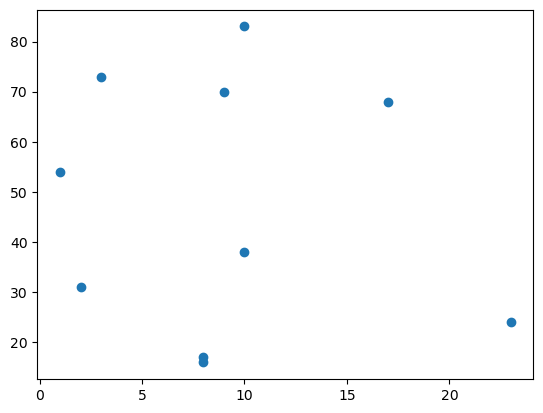

In [28]:
plt.scatter(train_data['yearsExperience'].head(10), train_data['milesFromMetropolis'].head(10))

# SCATTER PLOT

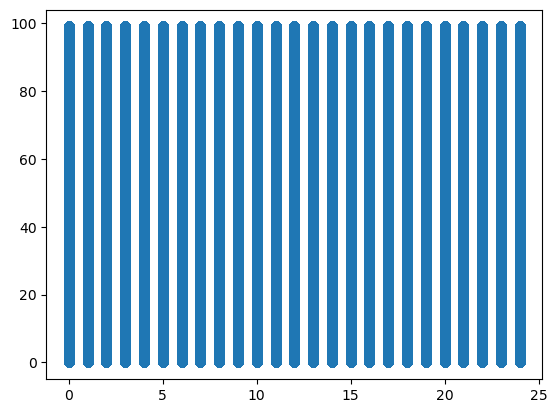

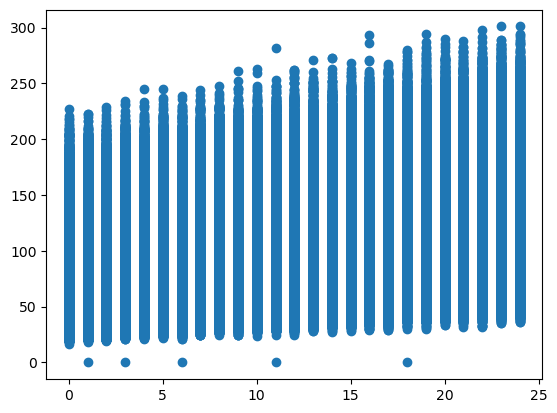

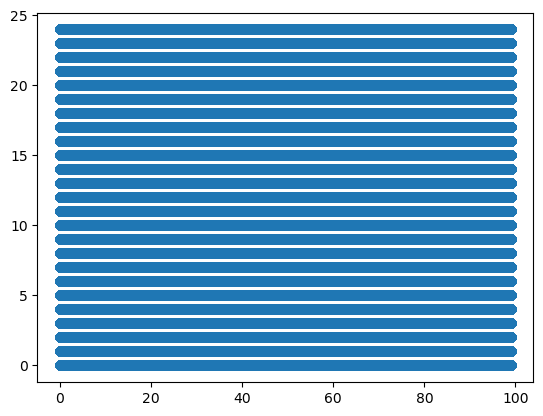

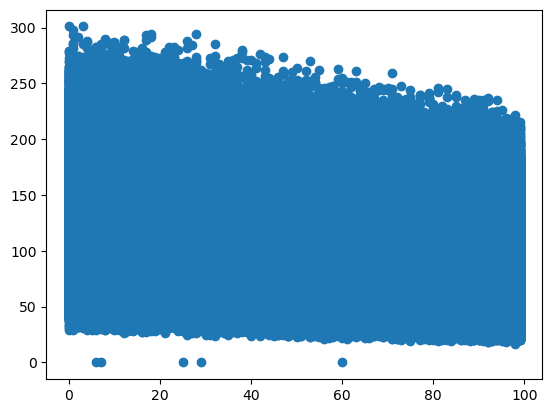

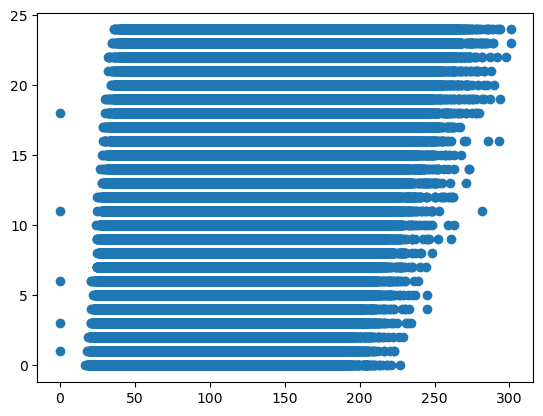

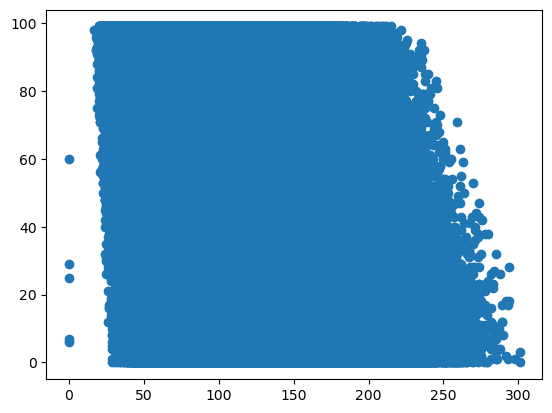

In [29]:
#def plot_scatter(x, y):
    #plt.scatter(train_data[x], train_data[y])
    #plt.show()
loop = ['yearsExperience', 'milesFromMetropolis', 'salary']
for x in loop:
    for i in loop:
        if i!=x:
            plt.scatter(train_data[x], train_data[i])
            plt.show()

# HISTOGRAM

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

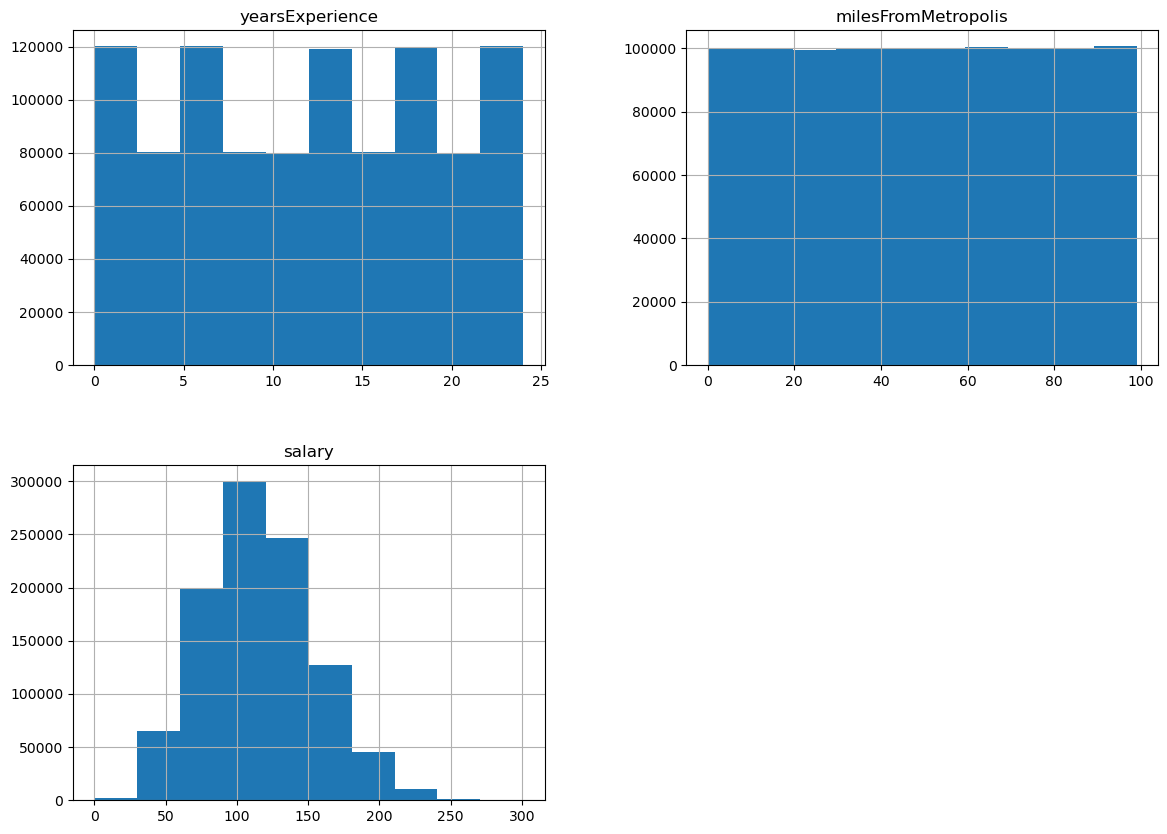

In [30]:
train_data.hist(column = ['yearsExperience', 'milesFromMetropolis', 'salary'], figsize = (14, 10))

<AxesSubplot:xlabel='jobType'>

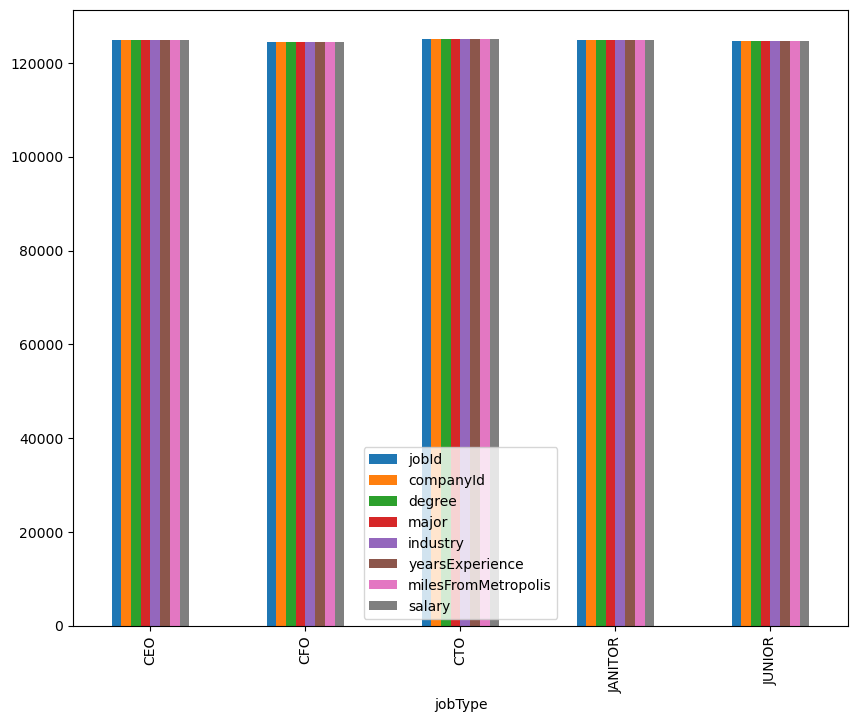

In [31]:
train_data.groupby(['jobType']).count().head(5).plot(kind = 'bar', figsize = (10, 8))

<AxesSubplot:xlabel='jobType'>

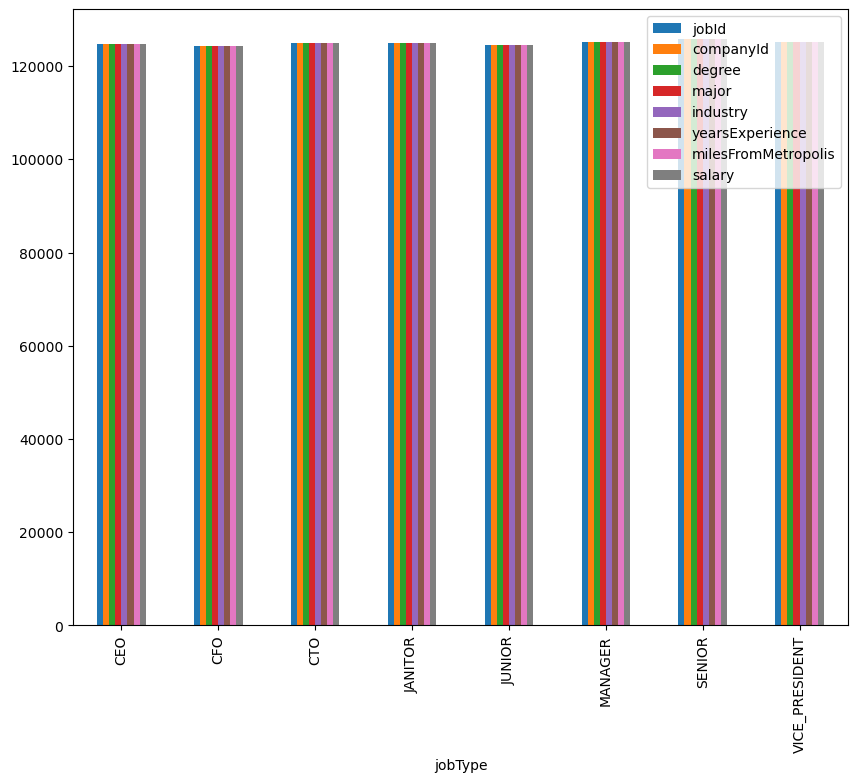

In [32]:
train_data.groupby(['jobType']).count().plot(kind = 'bar', figsize = (10, 8))

# BOX PLOT

<AxesSubplot:>

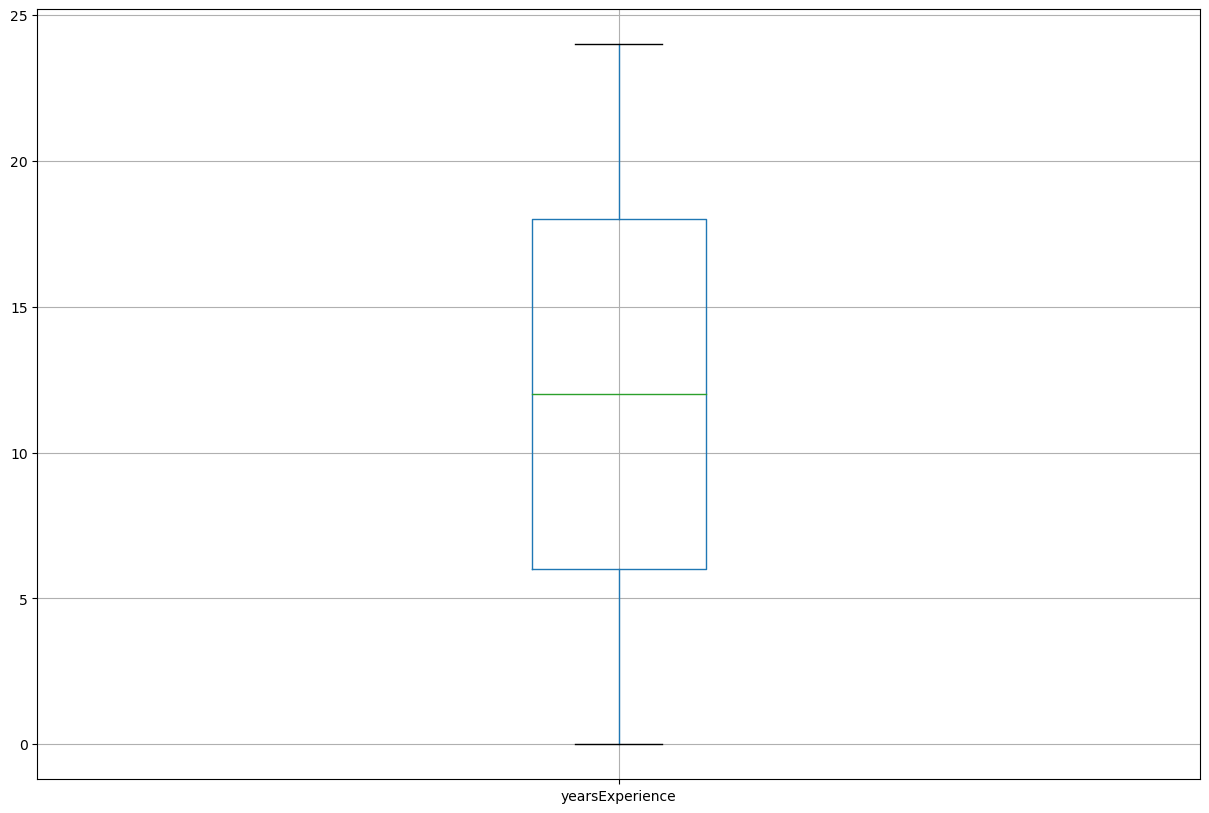

In [33]:
train_data.boxplot(column = 'yearsExperience', figsize = (15, 10))

In [8]:
# The formula to calculate 25th percentile or 1st quantile is 25/100[1+n] 
# In this case n = no. of observations that are present in 'yearsExperience' column. 
# The above formula just gives us the index not the value of 'yearsExperience at the index'. 
# After calculating the index, the observations of yearsExperience column are arranged in ASCENDING ORDER
# by the quantile function and then it assigns the value at the index to the variable q1. 
q1 = train_data['yearsExperience'].quantile(q = .25)
q1

6.0

In [35]:
q3 = train_data['yearsExperience'].quantile(q = .75)
q3

18.0

In [36]:
iqr = q3-q1
LL = q1-1.5*(iqr)
UL = q3+1.5*(iqr)
print(LL, UL)

-12.0 36.0


In [37]:
train_data['yearsExperience'].quantile(q = 0)

0.0

In [38]:
train_data['yearsExperience'].quantile(q = 1)

24.0

<AxesSubplot:>

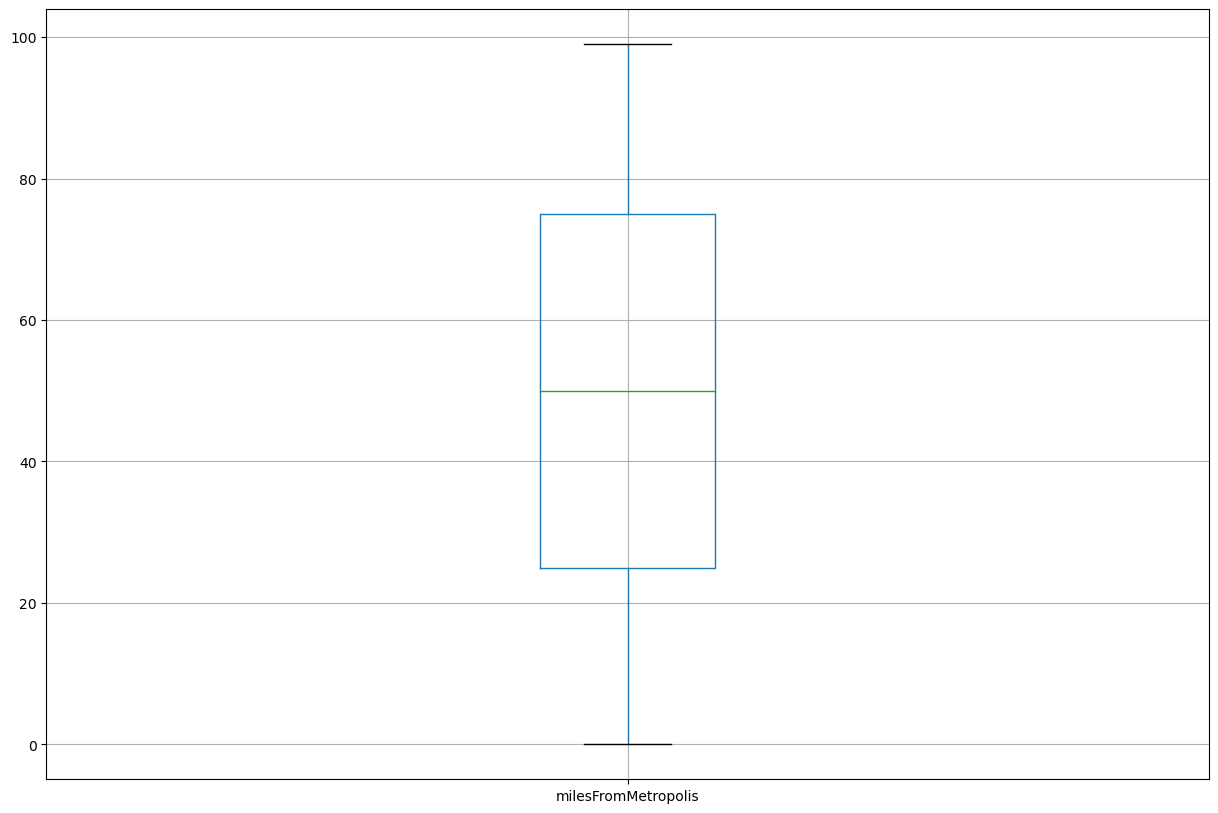

In [39]:
train_data.boxplot(column = 'milesFromMetropolis', figsize = (15, 10))

<AxesSubplot:>

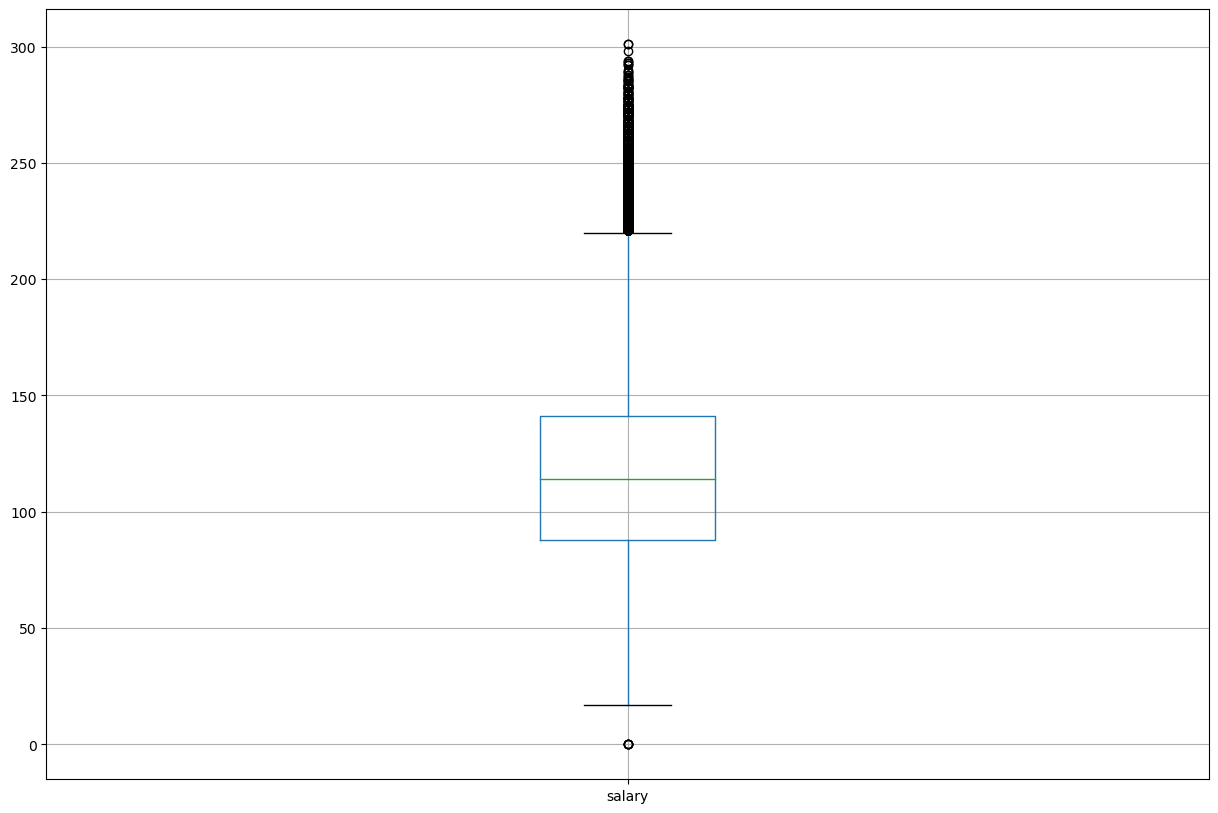

In [40]:
train_data.boxplot(column = 'salary', figsize = (15, 10))

In [41]:
q1 = train_data['salary'].quantile(q = .25)
q1

88.0

In [42]:
q3 = train_data['salary'].quantile(q = .75)
q3

141.0

In [43]:
train_data['salary'].quantile(q = 0)

0.0

In [44]:
train_data['salary'].quantile(q = 1)

301.0

In [45]:
iqr = q3-q1
LL = q1-1.5*(iqr)
UL = q3+1.5*(iqr)
print(LL, UL)

8.5 220.5


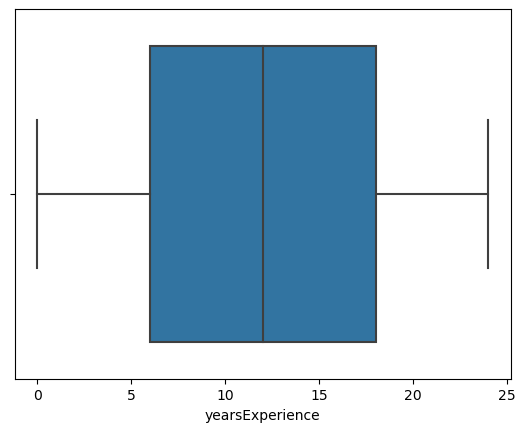

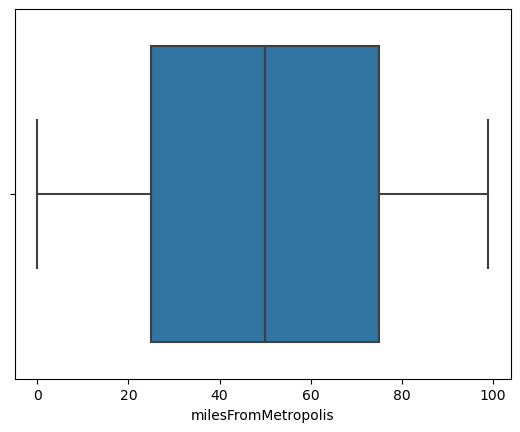

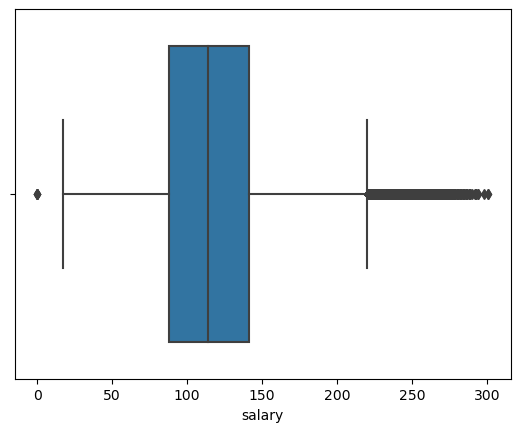

In [46]:
for i in loop:
    sns.boxplot(train_data[i])
    plt.show()

# VIOLIN PLOT

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

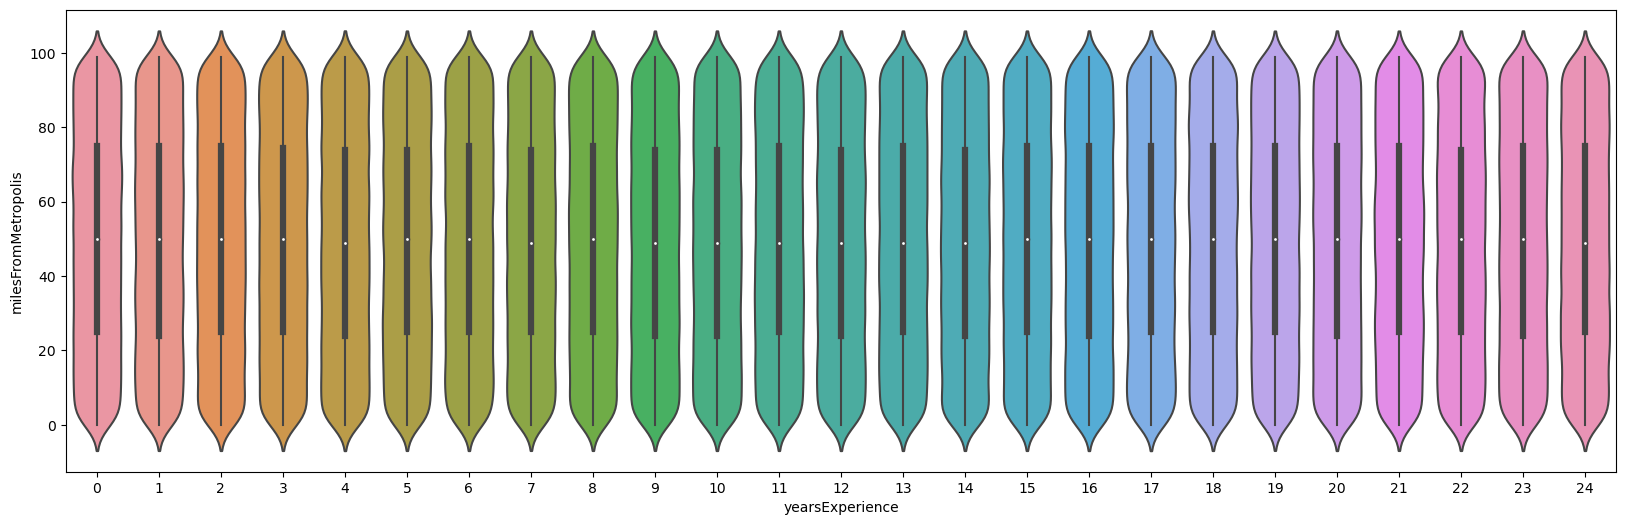

In [47]:
plt.figure(figsize = (20, 6))
sns.violinplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data)

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

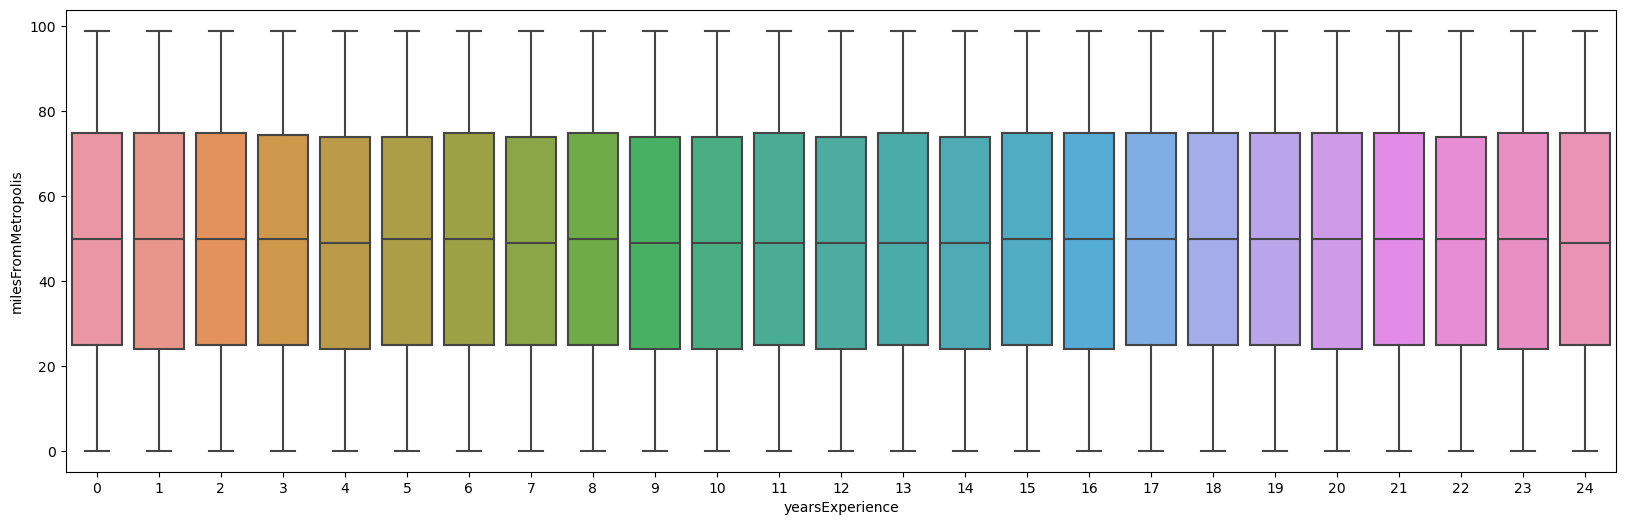

In [48]:
plt.figure(figsize = (20, 6))
sns.boxplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data)

In [49]:
train_data[train_data['milesFromMetropolis']<2]

jobId companyId         jobType       degree        major  \
214     JOB1362684407901    COMP13             CEO    BACHELORS  ENGINEERING   
217     JOB1362684407904     COMP9         JANITOR         NONE         NONE   
261     JOB1362684407948    COMP43  VICE_PRESIDENT         NONE         NONE   
267     JOB1362684407954    COMP22         JANITOR  HIGH_SCHOOL         NONE   
282     JOB1362684407969    COMP20          JUNIOR         NONE         NONE   
...                  ...       ...             ...          ...          ...   
999801  JOB1362685407488    COMP38         JANITOR         NONE         NONE   
999805  JOB1362685407492     COMP0         JANITOR         NONE         NONE   
999855  JOB1362685407542    COMP23          SENIOR      MASTERS   LITERATURE   
999857  JOB1362685407544    COMP33         MANAGER    BACHELORS      BIOLOGY   
999871  JOB1362685407558    COMP12             CFO  HIGH_SCHOOL         NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
214     EDUCATION               10                    0     146  
217       FINANCE               14                    0     100  
261     EDUCATION               13                    1      95  
267          AUTO                1                    0      51  
282           WEB               11                    1      84  
...           ...              ...                  ...     ...  
999801     HEALTH                7                    0      60  
999805        WEB                5                    1      82  
999855    SERVICE               21                    0     129  
999857        OIL                6                    0     132  
999871  EDUCATION                9                    0     114  

[20214 rows x 9 columns]

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

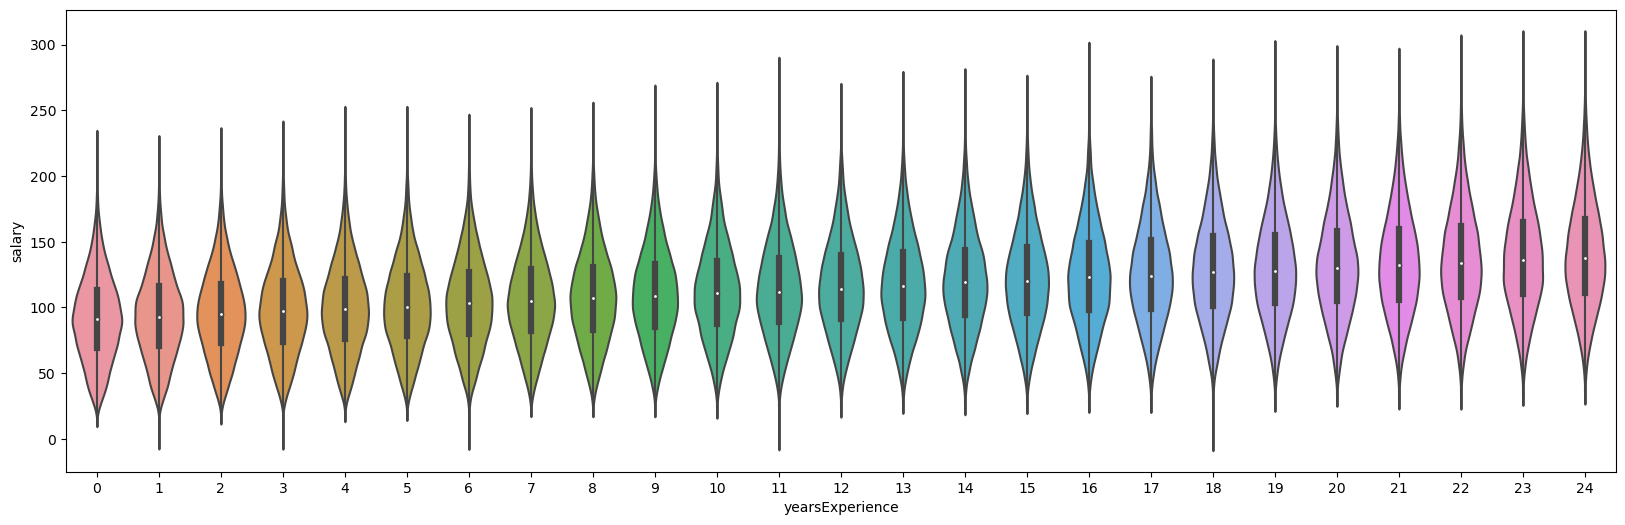

In [50]:
plt.figure(figsize = (20, 6))
sns.violinplot(x = 'yearsExperience', y = 'salary', data = train_data)

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

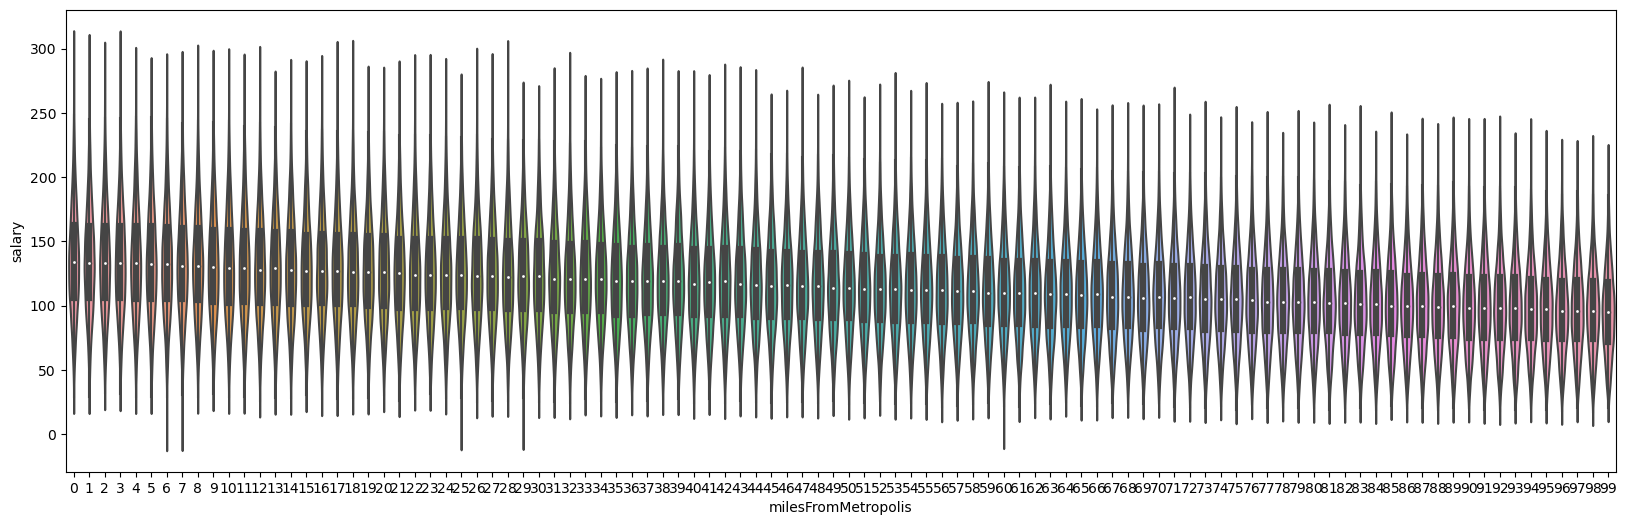

In [51]:
plt.figure(figsize = (20, 6))
sns.violinplot(x = 'milesFromMetropolis', y = 'salary', data = train_data)

# Boxen Plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

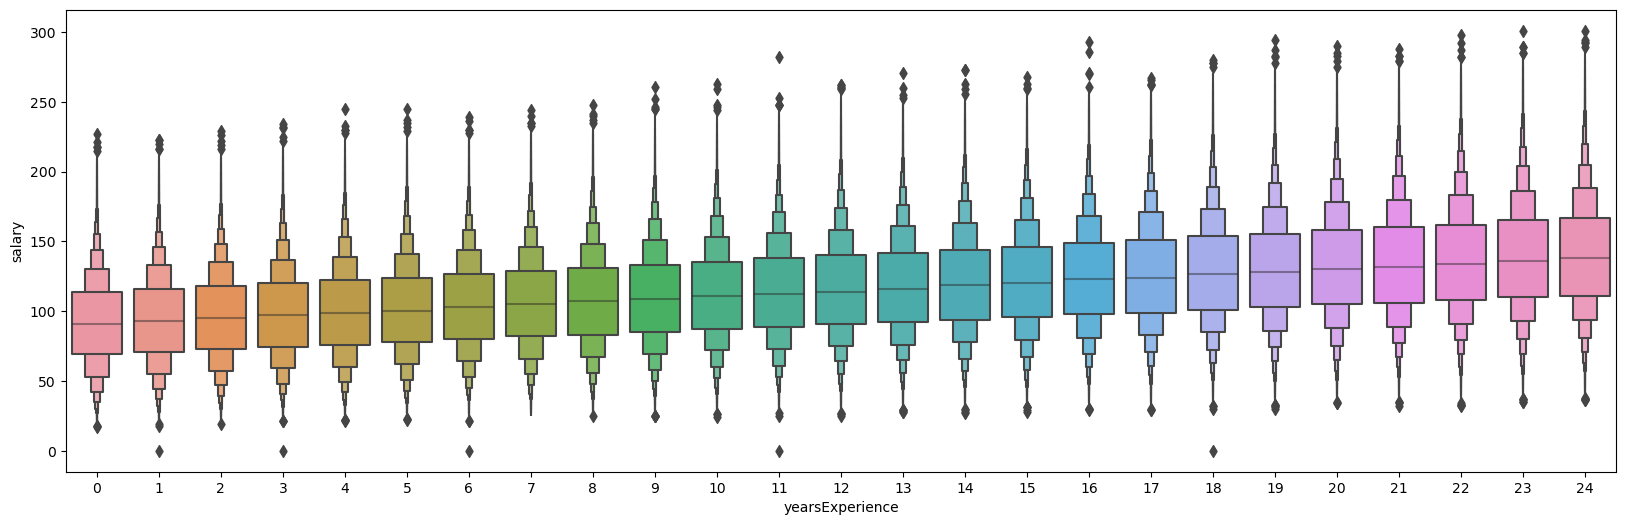

In [52]:
plt.figure(figsize = (20, 6))
sns.boxenplot(x = 'yearsExperience', y = 'salary', data = train_data)

In [53]:
g = train_data[train_data['yearsExperience']==0]

In [54]:
type(g)

pandas.core.frame.DataFrame

In [55]:
g.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [56]:
g.count()

jobId                  39839
companyId              39839
jobType                39839
degree                 39839
major                  39839
industry               39839
yearsExperience        39839
milesFromMetropolis    39839
salary                 39839
dtype: int64

In [57]:
g['salary'].quantile(q = 0.9375)

144.0

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

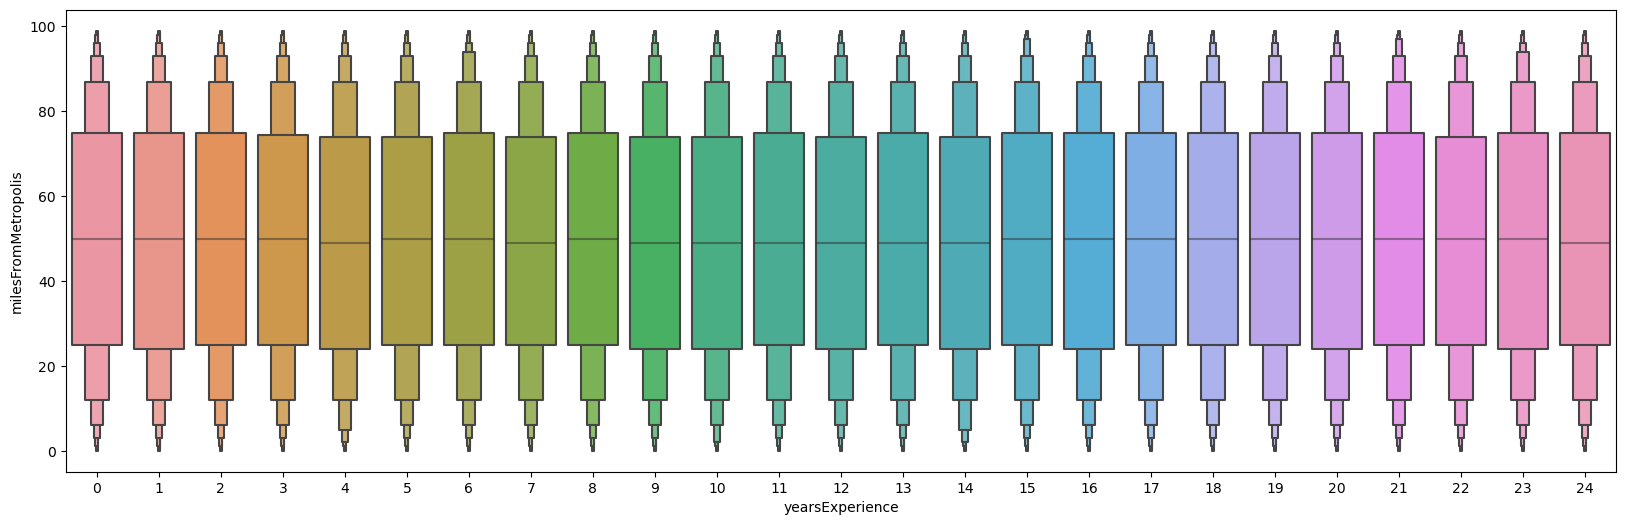

In [58]:
plt.figure(figsize = (20, 6))
sns.boxenplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data)

In [59]:
g['milesFromMetropolis'].quantile(q = 0.75)

75.0

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

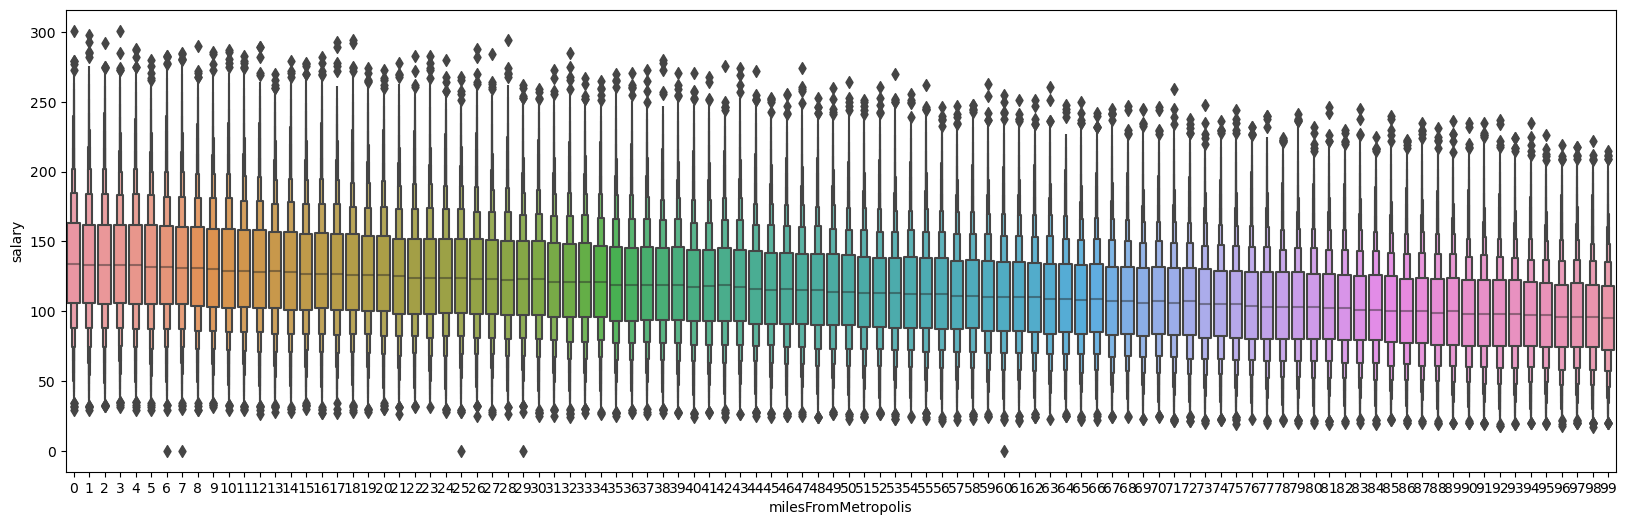

In [60]:
plt.figure(figsize = (20, 6))
lpod = sns.boxenplot(x = 'milesFromMetropolis', y = 'salary', data = train_data)
lpod

In [61]:
type(lpod)

matplotlib.axes._subplots.AxesSubplot

In [62]:
g1 = train_data[train_data['milesFromMetropolis']==0]
g1.count()

jobId                  10123
companyId              10123
jobType                10123
degree                 10123
major                  10123
industry               10123
yearsExperience        10123
milesFromMetropolis    10123
salary                 10123
dtype: int64

In [63]:
g1['salary'].quantile(q =0.5)

134.0

# POINT PLOT

### Point plot provides the mean value(central tendency) of the data and the 95% confidence intervals of the mean.
In point plot line stretches from lower bound to upper bound  of 95% confidence intervals and the dot represents the actual mean of the sampled data.

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

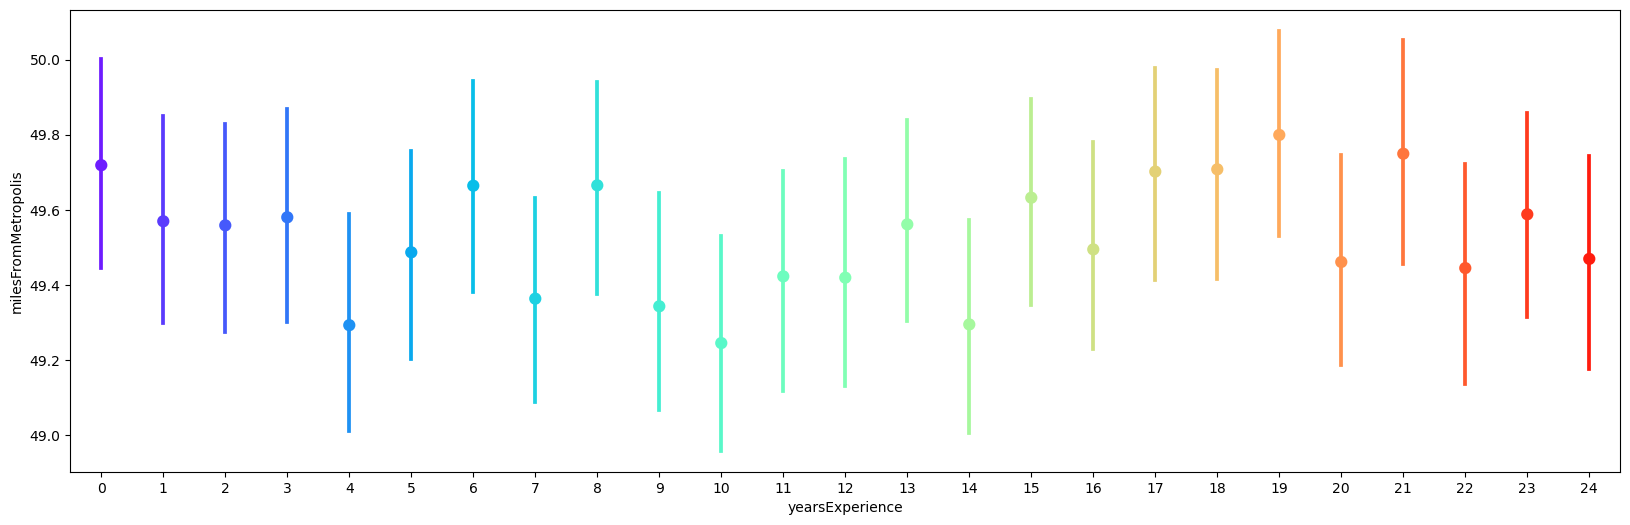

In [64]:
plt.figure(figsize = (20, 6))
sns.pointplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data, palette = 'rainbow')

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

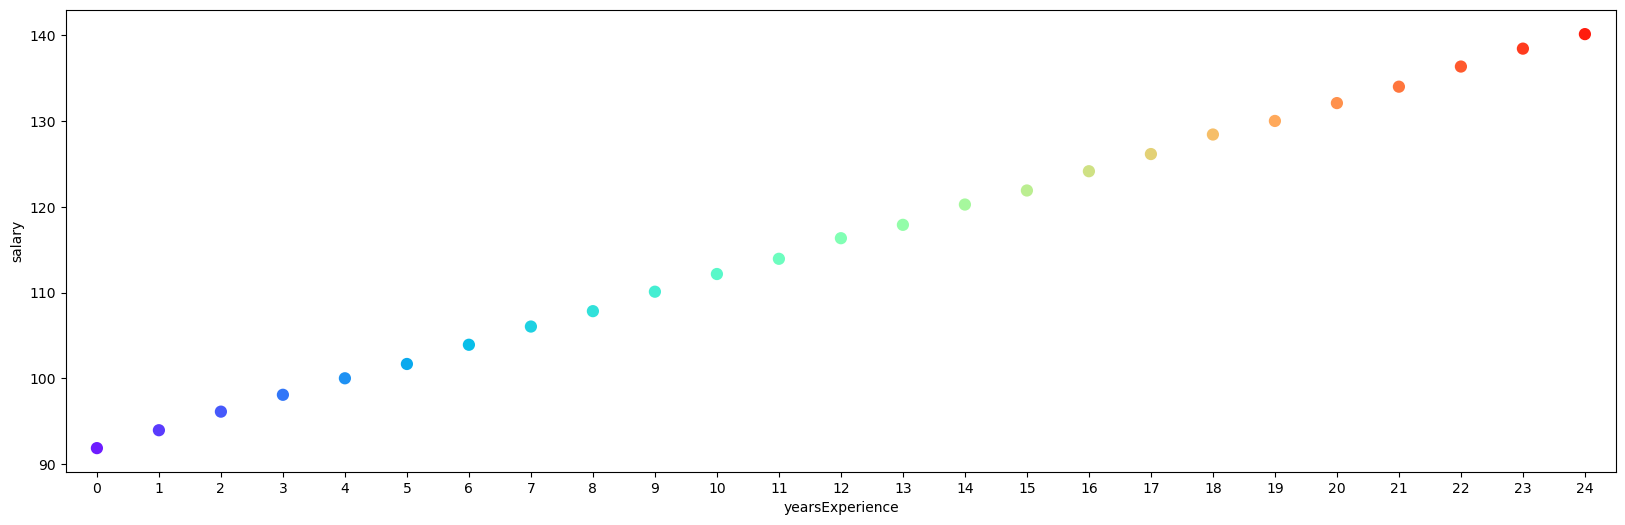

In [65]:
plt.figure(figsize = (20, 6))
sns.pointplot(x = 'yearsExperience', y = 'salary', data = train_data, palette = 'rainbow')

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

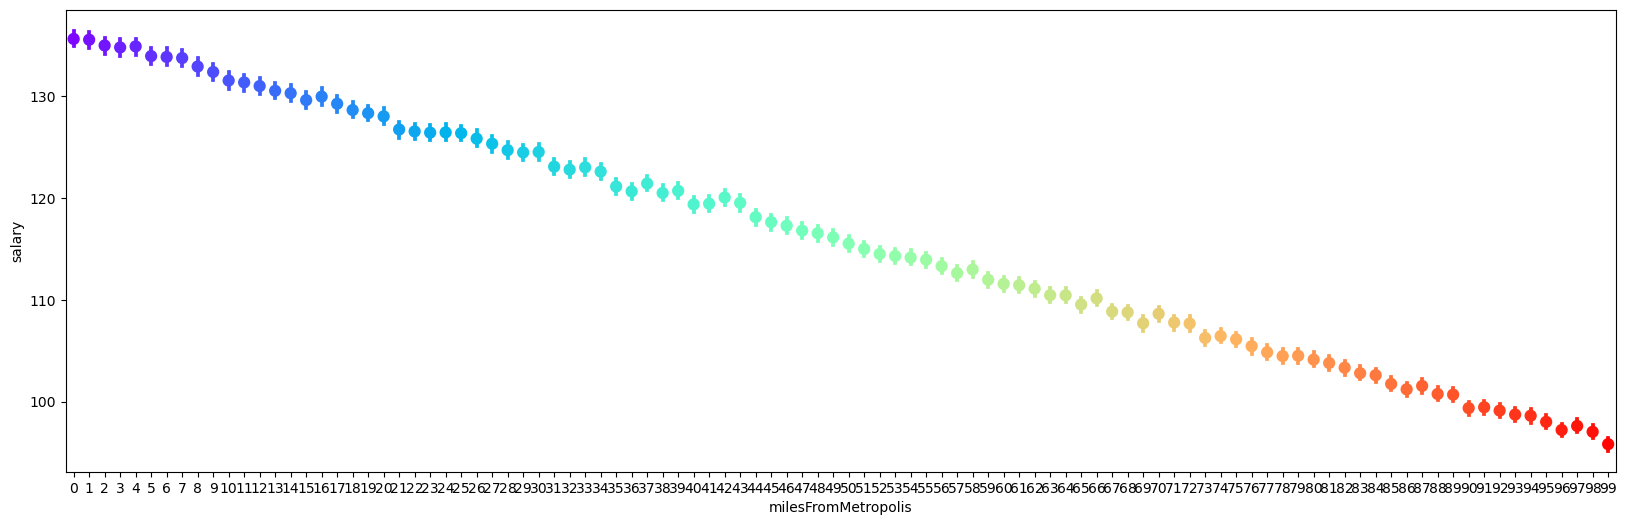

In [66]:
plt.figure(figsize = (20, 6))
sns.pointplot(x = 'milesFromMetropolis', y = 'salary', data = train_data, palette = 'rainbow')

# Count Plot

## It just gives the count of all the observations of the column(of the dataframe) on X-axis.

<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

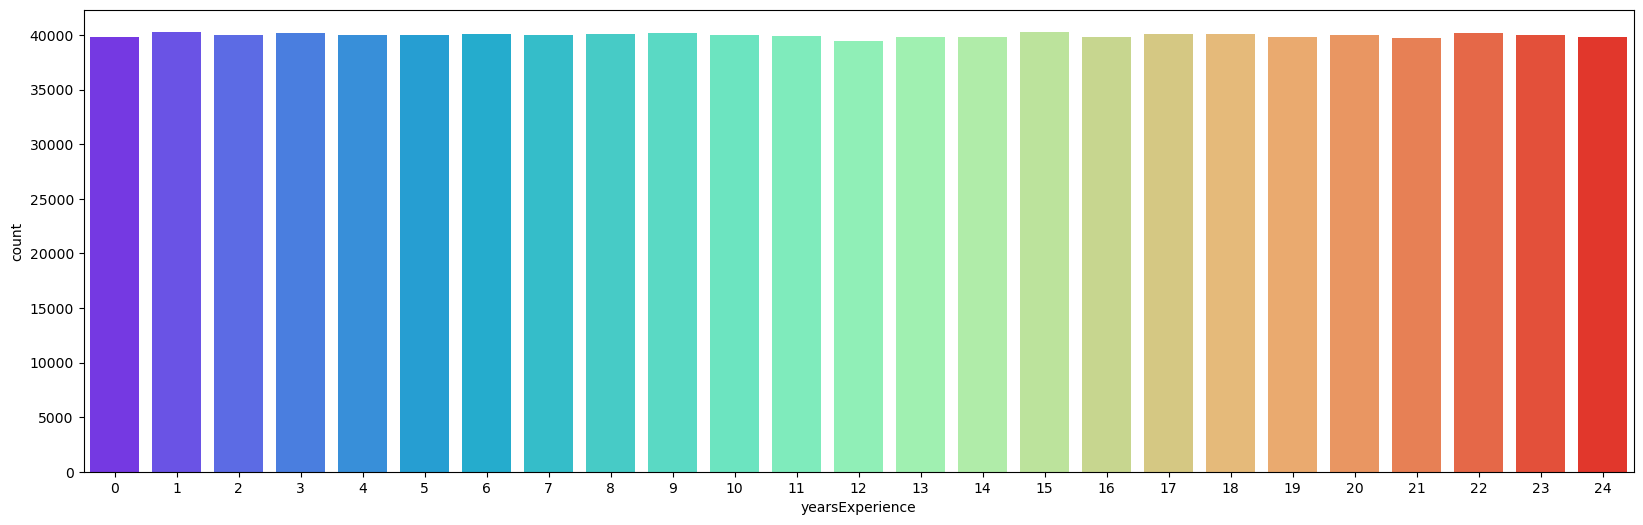

In [67]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'yearsExperience', data = train_data, palette = 'rainbow')

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

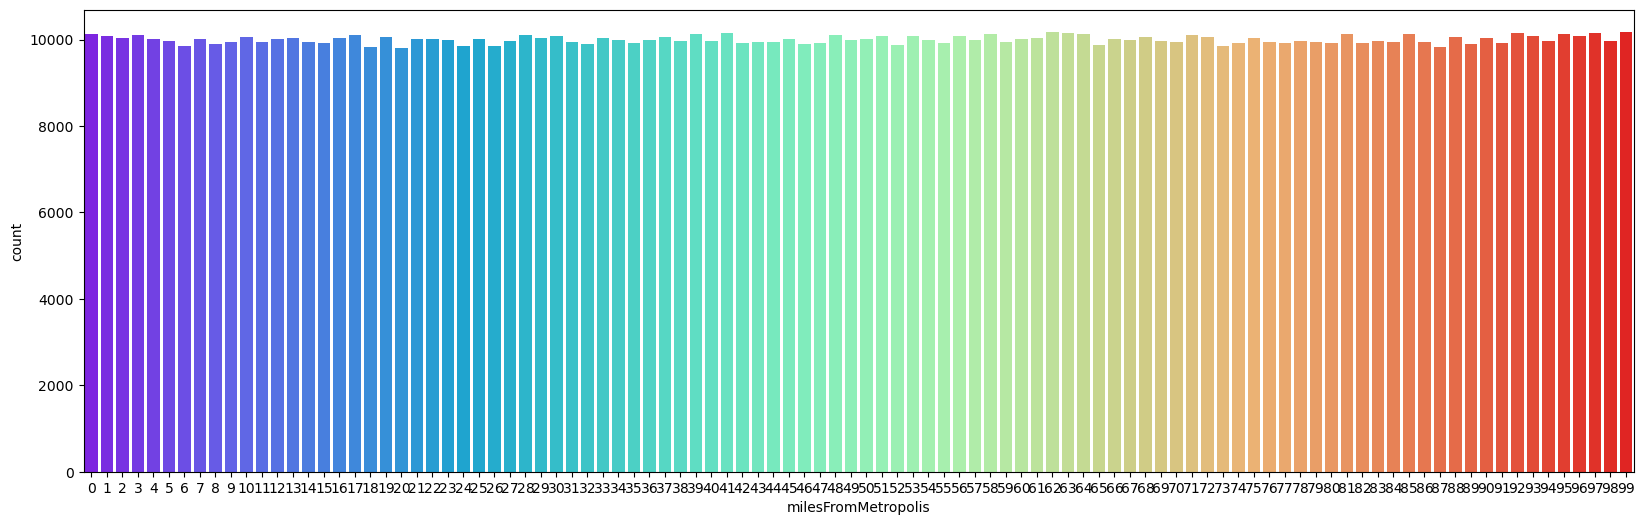

In [68]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'milesFromMetropolis', data = train_data, palette = 'rainbow')

<AxesSubplot:xlabel='salary', ylabel='count'>

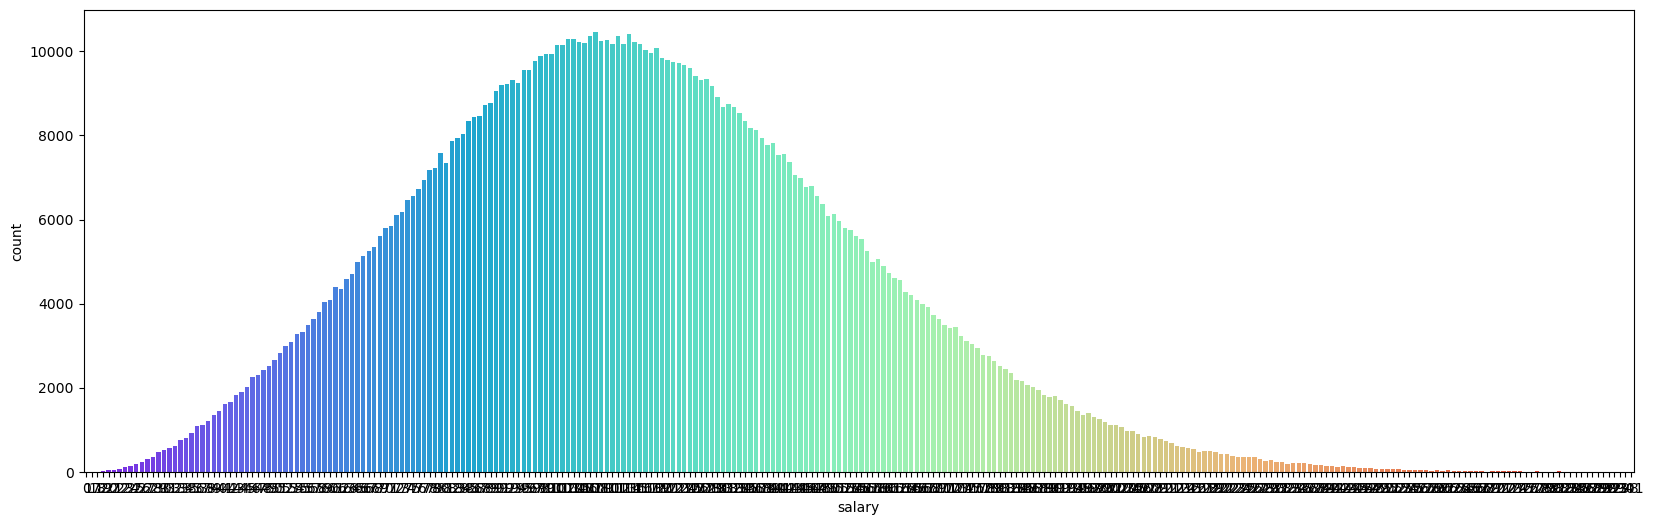

In [69]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'salary', data = train_data, palette = 'rainbow')

# SWARM PLOT

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

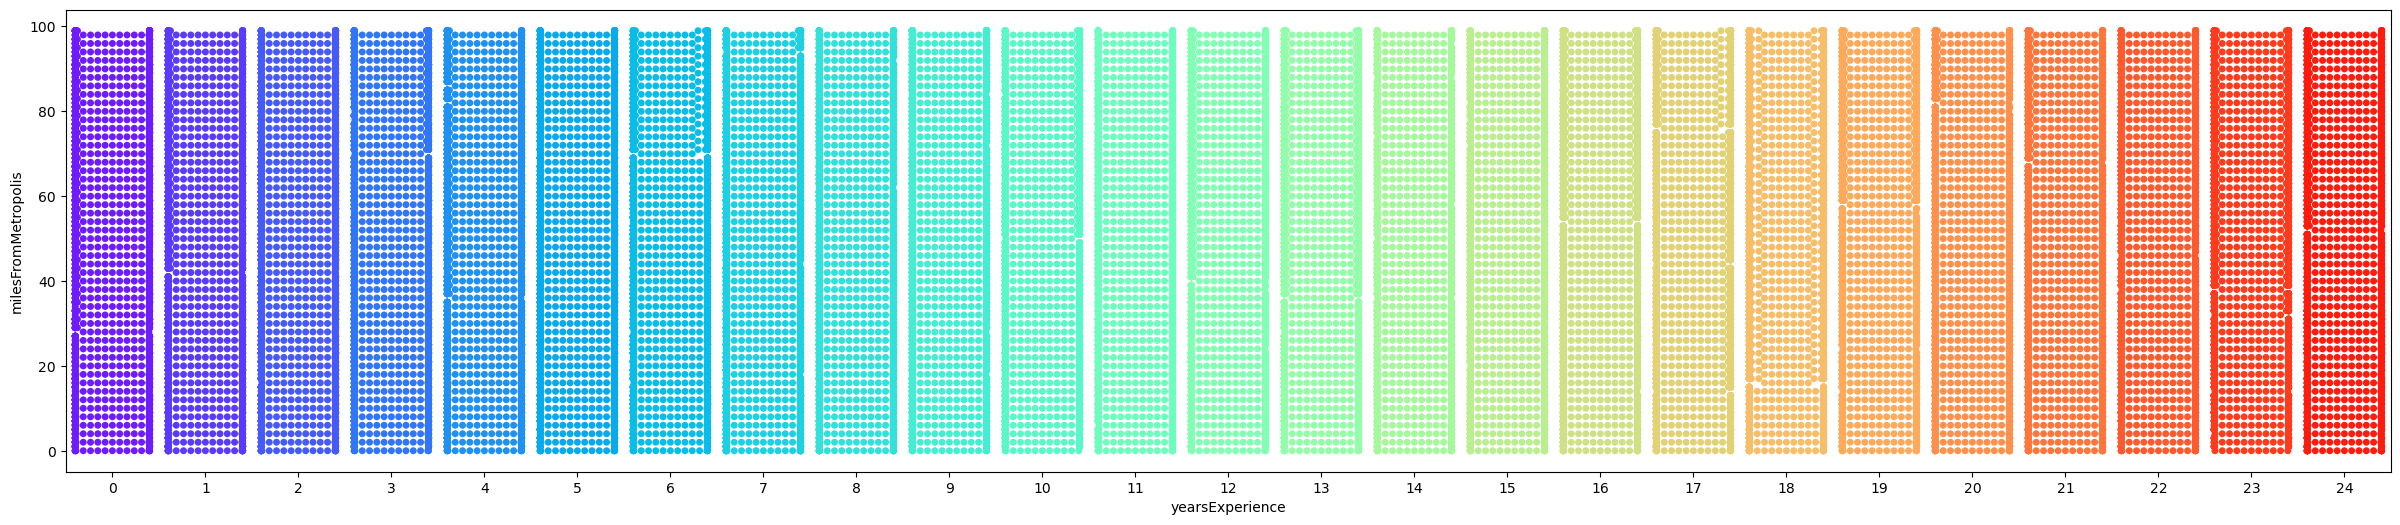

In [70]:
plt.figure(figsize = (30, 6))
sns.swarmplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data.iloc[1:50000], palette = 'rainbow')

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

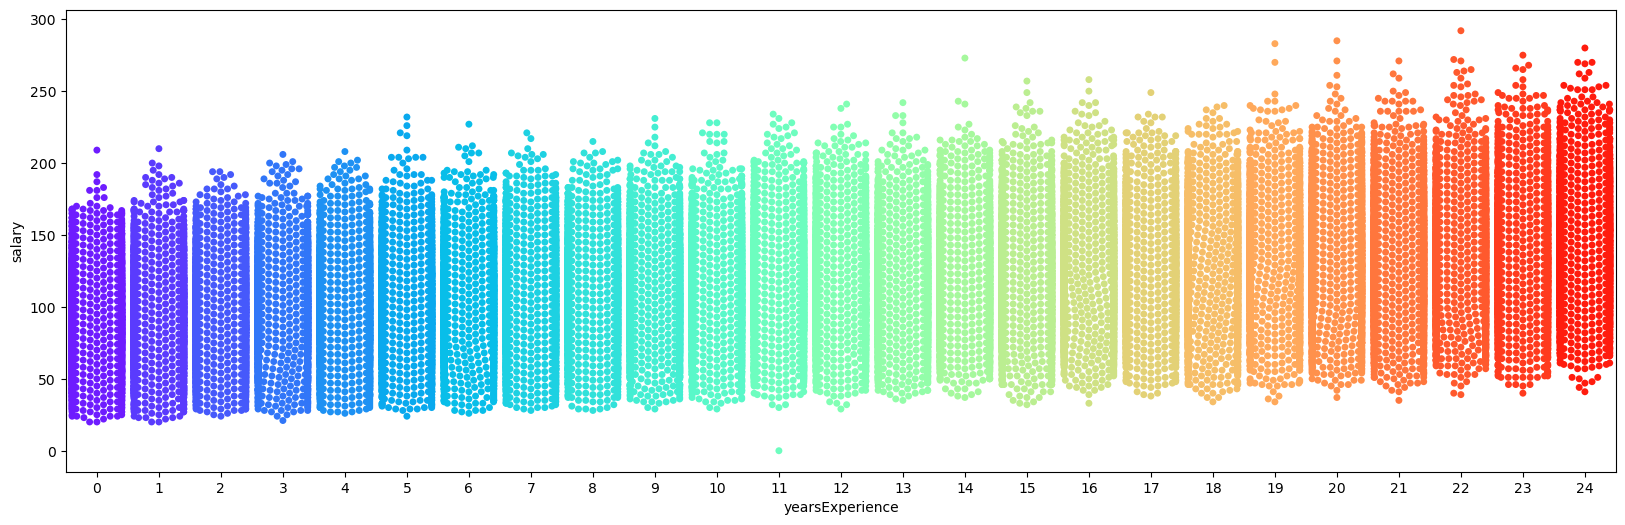

In [71]:
plt.figure(figsize = (20, 6))
sns.swarmplot(x = 'yearsExperience', y = 'salary', data = train_data.iloc[1:50000], palette = 'rainbow')

# COMBINE PLOT

<AxesSubplot:xlabel='yearsExperience', ylabel='milesFromMetropolis'>

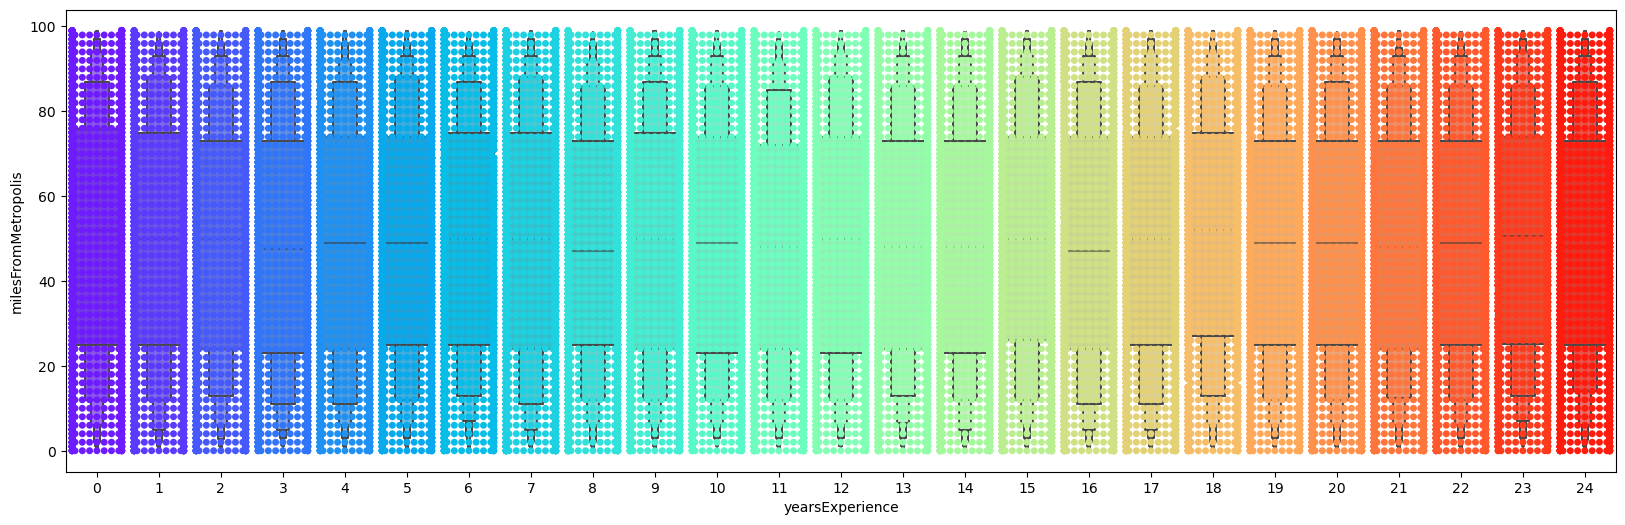

In [72]:
plt.figure(figsize = (20, 6))
sns.boxenplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data.iloc[1:50000], palette = 'rainbow')
sns.swarmplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data.iloc[1:50000], palette = 'rainbow')

# VARIANCE INFLATION FACTOR

In [81]:
train_for_vif = train_data.drop(['jobType', 'degree', 'major', 'industry', 'salary'], axis =1)

In [82]:
train_for_vif.head(1)


yearsExperience  milesFromMetropolis
0               10                   83

In [83]:
target = train_data['salary']

In [84]:
names = ['yearsExperience', 'milesFromMetropolis']

In [85]:
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [86]:
for i in range(0, len(names)):
    y = train_for_vif.loc[:, train_for_vif.columns == names[i]] 
    x = train_for_vif.loc[:, train_for_vif.columns!= names[i]]
    model = sm.OLS(y,x)
    results = model.fit()   #Here results =  Regression results which also has many properties and attributes.
    print(results)
    rsq = results.rsquared  # Here rsquared is one of the properties of results
    print(rsq)
    vif = round(1/(1-rsq), 2)
    print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
    print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

0.5483256412061387
R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21 

0.5483256412061392
R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21 



# ANOVA TEST

In [87]:
def perform_anova_test(x, y):
    # two variables of interest
    train_anova = train_data[[x, y]]
    groups = train_anova.groupby(x).count().reset_index()
    print(groups)
    
    unique_majors = train_anova[x].unique()
    print(unique_majors)
    print(type(unique_majors))
    for major in unique_majors:
        stats.probplot(train_anova[train_anova[x] == major][y], dist = 'norm', plot = plt)
        plt.title('Probability Plot -' + str(major))
        plt.show()
 #Calculate the ratio of the largest to the smallest sample standard deviation 
    ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
    print(train_anova.groupby(x).std().max())
    print(ratio)        

    # Create ANOVA Backbone table
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])
    print(anova_table)
    anova_table.set_index('Source of Variation', inplace = True)    

#Calculate SSTR and update ANOVA table
    
    x_bar = train_anova[y].mean()
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
    print('----------------Please be careful---------')
    print(type(SSTR))
    print(SSTR)
    anova_table['SS']['Between Groups'] = SSTR[y].sum() 
    print(anova_table)
    
    #Calculate SSE and update ANOVA table
    
    SSE = (train_anova.groupby(x).count() - 1) * (train_anova.groupby(x).std()**2)
    anova_table['SS']['Within Groups'] = SSE[y].sum()
    print(anova_table)
    
    #Calculate SSTR and update ANOVA table
    
    SSTR = SSTR[y].sum() + SSE[y].sum()
    anova_table['SS']['Total'] = SSTR
    print('---------------------------------------------------')
    print(anova_table)
    
    # Update degree of freedom
    
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1   
    print(anova_table)
    print('----------------------------------------------------------------------------------')
    # Calculate MS
    
    anova_table['MS'] = anova_table['SS'] / anova_table['df']
    print(anova_table)
    print('----------------------------------------------------------------------------------')
    
    #Calculate F
    
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F
    print(anova_table)
    print('----------------------------------------------------------------------------------')
    
    #P-value
    
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
    print(anova_table)
    print('----------------------------------------------------------------------------------')     
    
    # F- Critical
    
    alpha = 0.05
    
    # Possible types right-tailed, left-tailed, two-tailed
    
    tail_hypothesis_type = 'two-tailed'
    if tail_hypothesis_type == 'two-tailed':
        alpha /=2 
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups']) 
    print(anova_table)
    print('----------------------------------------------------------------------------------')    
    
    # The P-value approach
    
    print('Approach 1: The p-value approach to hypothesis testing in the decision rule')
    conclusion = 'Failed to reject the Null Hypothesis'
    
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = 'Null Hypothesis rejected'
        
    print('F-score:', anova_table['F']['Between Groups'], 'and p value is:', anova_table['P-value']['Between Groups'])
    print(conclusion)
    
    # The Critical value approach
    
    print('\n-----------------------------------------------------------------------')
    print('Approach 2: The Critical value approach to hypothesis testing in the decision rule')
    conclusion = 'Failed to reject the null hypothesis.'
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = 'Null Hypothesis rejected'
    print('F-score:', anova_table['F']['Between Groups'], 'and critical value is:', anova_table['F crit']['Between Groups'])
    print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410
['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']
<class 'numpy.ndarray'>


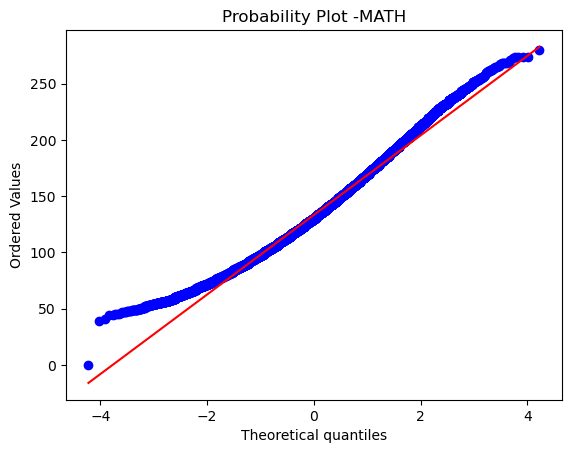

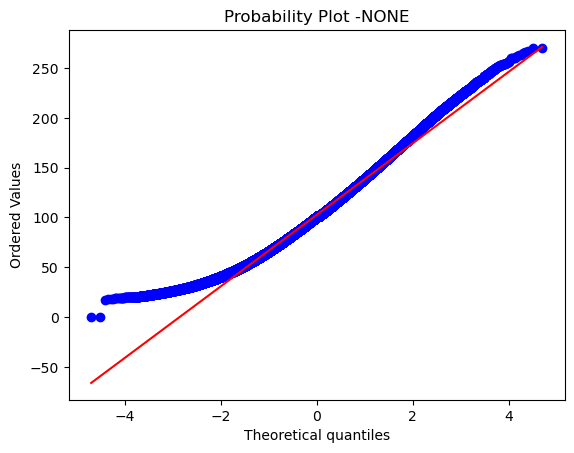

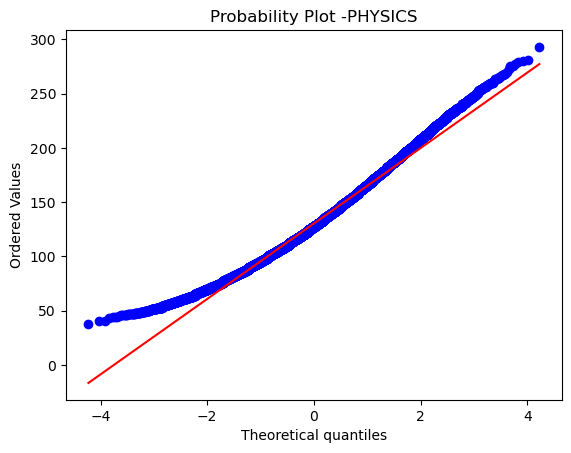

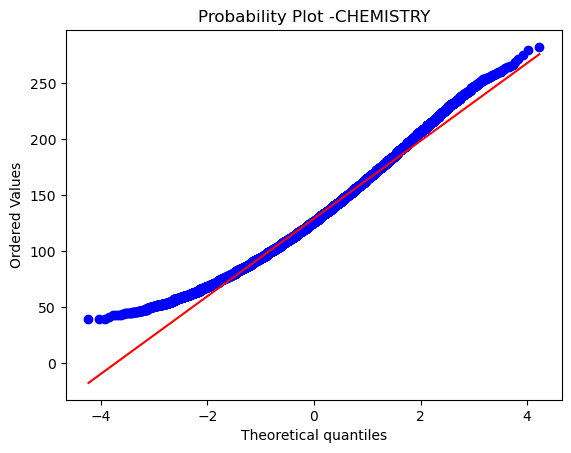

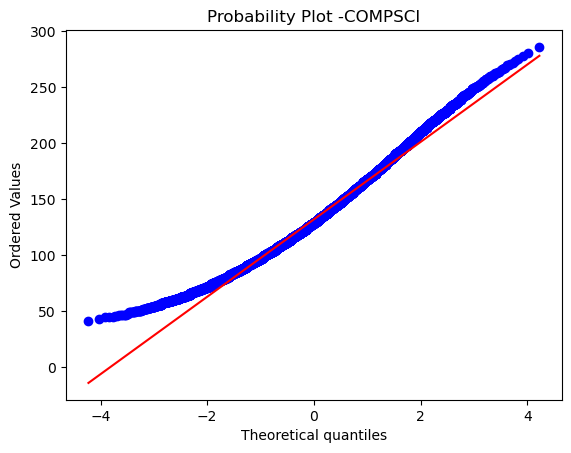

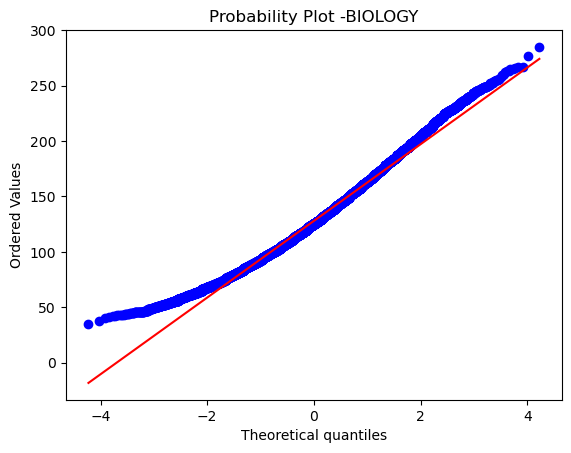

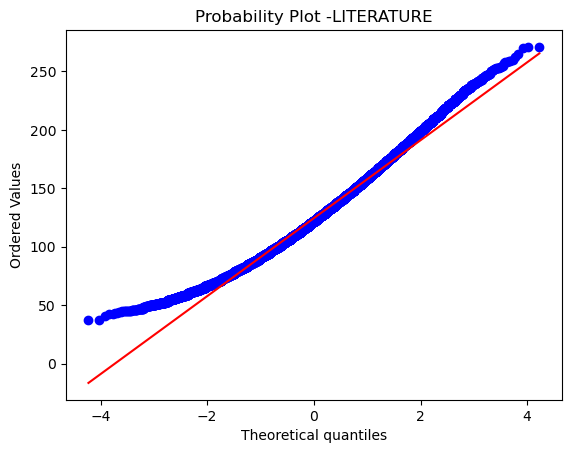

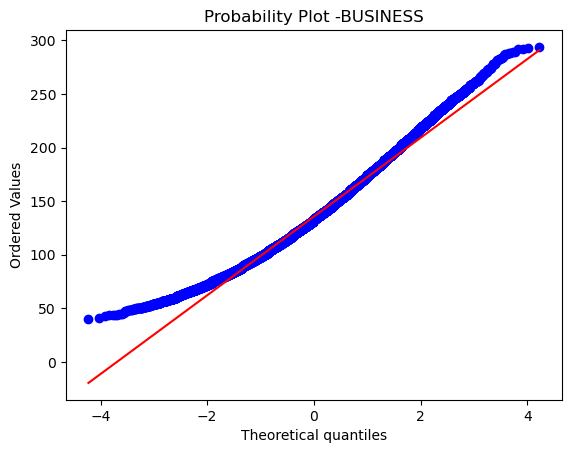

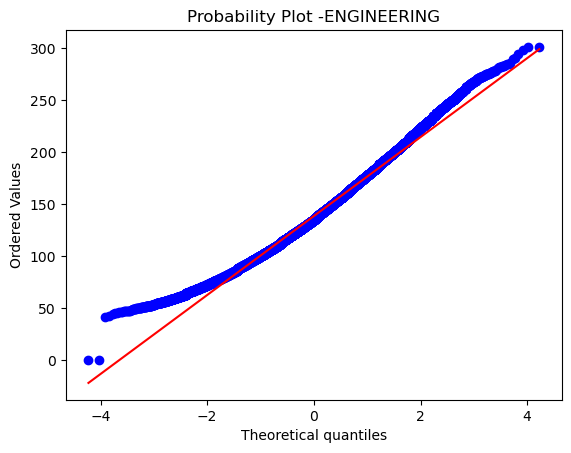

salary    38.186849
dtype: float64
salary    1.137312
dtype: float64
  Source of Variation SS df MS F P-value F crit
0      Between Groups                          
1       Within Groups                          
2               Total                          
----------------Please be careful---------
<class 'pandas.core.frame.DataFrame'>
                   salary
major                    
BIOLOGY      8.226593e+06
BUSINESS     2.245083e+07
CHEMISTRY    9.965597e+06
COMPSCI      1.497156e+07
ENGINEERING  2.933501e+07
LITERATURE   4.102656e+06
MATH         1.721520e+07
NONE         9.671060e+07
PHYSICS      1.196201e+07
                                   SS df MS F P-value F crit
Source of Variation                                         
Between Groups       214940060.760225                       
Within Groups                                               
Total                                                       
                                    SS df MS F P-value F crit
Sourc

In [88]:
perform_anova_test('major', 'salary')

# DENDROGRAM

In [89]:
X = train_data[1:50000]


In [90]:
from scipy.cluster import hierarchy as hc

In [91]:
corr = np.round_(stats.spearmanr(X).correlation, 4)

In [92]:
corr

array([[ 1.000e+00, -2.090e-02, -2.450e-02,  1.800e-03, -0.000e+00,
         2.700e-03, -2.313e-01],
       [-2.090e-02,  1.000e+00,  3.680e-01, -5.000e-03,  4.000e-03,
         5.900e-03, -2.363e-01],
       [-2.450e-02,  3.680e-01,  1.000e+00, -1.030e-02, -4.000e-03,
         8.900e-03, -2.678e-01],
       [ 1.800e-03, -5.000e-03, -1.030e-02,  1.000e+00,  2.500e-03,
         2.200e-03,  7.750e-02],
       [-0.000e+00,  4.000e-03, -4.000e-03,  2.500e-03,  1.000e+00,
         1.000e-04,  3.637e-01],
       [ 2.700e-03,  5.900e-03,  8.900e-03,  2.200e-03,  1.000e-04,
         1.000e+00, -2.873e-01],
       [-2.313e-01, -2.363e-01, -2.678e-01,  7.750e-02,  3.637e-01,
        -2.873e-01,  1.000e+00]])

In [93]:
type(corr)

numpy.ndarray

In [94]:
corr_condensed = hc.distance.squareform(1-corr)

In [96]:
corr_condensed

array([1.0209, 1.0245, 0.9982, 1.    , 0.9973, 1.2313, 0.632 , 1.005 ,
       0.996 , 0.9941, 1.2363, 1.0103, 1.004 , 0.9911, 1.2678, 0.9975,
       0.9978, 0.9225, 0.9999, 0.6363, 1.2873])

In [95]:
type(corr_condensed)

numpy.ndarray

In [114]:
z = hc.linkage(corr_condensed, method = 'average') # This function is used to perform hierarchical clustering.
z

array([[ 1.        ,  2.        ,  0.632     ,  2.        ],
       [ 4.        ,  6.        ,  0.6363    ,  2.        ],
       [ 3.        ,  8.        ,  0.96      ,  3.        ],
       [ 5.        ,  7.        ,  0.9926    ,  3.        ],
       [ 0.        , 10.        ,  1.01423333,  4.        ],
       [ 9.        , 11.        ,  1.08615833,  7.        ]])

In [115]:
fig = plt.figure(figsize = (16, 10))

<Figure size 1600x1000 with 0 Axes>

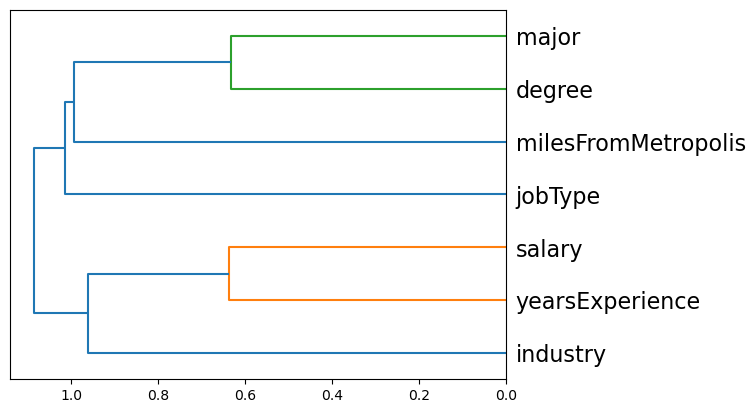

In [116]:
dendrogram = hc.dendrogram(z, labels = X.columns, orientation = 'left', leaf_font_size = 16) 
# This function is used to plot hierarchical clustering i.e., dendrogram.

 ### The above dendrogram shows the bottom-up approach of Agglomerative clustering

# FEATURE SCALING

In [117]:
#Helper function for scaling all the numerical data using MinMaxScaler

def scale_data(df, col):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    df[col] = scaler.fit_transform(df[col])
    #print(df[col])
    return df


In [118]:
# Making a list of column names to be scaled

col_train = ["yearsExperience", "milesFromMetropolis"]

#passing data and name for scaling

train_data = scale_data(train_data, col_train)

In [119]:
train_data.head(2)

jobType       degree major industry  yearsExperience  milesFromMetropolis  \
0     CFO      MASTERS  MATH   HEALTH         0.416667             0.838384   
1     CEO  HIGH_SCHOOL  NONE      WEB         0.125000             0.737374   

   salary  
0     130  
1     101

# MODELLING

In [282]:
from sklearn.preprocessing import OneHotEncoder as Sk

#Class for containing all functionality required for OneHotEncoding

class OneHotEncoder(Sk):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
    
#Helper function to fit data

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        #print('-----------------------------------------------')
        #print(out)
        return out

# Helper function to transform data

    def transform(self, X, **kwargs):
        #print('--------------------------------------------------------')
        #print(X.head())
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        #print('------------------------------------------------------------')
        #print(sparse_matrix)
        new_columns = self.get_new_columns(X)
        #print('------------------------------------------------------------')
        #print(new_columns)
        print(type(new_columns)) 
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index) 
        # Here sparse_matrix.toarray() converts our sparse matrix to an array where each record contains 31 columns
        return d_out

#Helper function to fit and transform data

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

# Helper function to get new column names after fitting and transforming data

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            
            j = 0
            #print(self.categories_[i])
            while j<len(self.categories_[i]):    # Here categories_ is an attribute of OneHotEncoder class.
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j+=1
        return new_columns


In [283]:
#Split the labels and the target

train_X = train_data.drop(['salary', 'yearsExperience', 'milesFromMetropolis'], axis = 1)
train_Y = train_data['salary']

In [284]:
# Looking at Features
train_X.head()

jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [285]:
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [286]:
len(train_X)

1000000

In [287]:
# Passing the features dataframe(train_X) for one-hot encoding process

encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()

<class 'list'>


jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [251]:
encoder.categories_

[array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
        'VICE_PRESIDENT'], dtype=object),
 array(['BACHELORS', 'DOCTORAL', 'HIGH_SCHOOL', 'MASTERS', 'NONE'],
       dtype=object),
 array(['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING',
        'LITERATURE', 'MATH', 'NONE', 'PHYSICS'], dtype=object),
 array(['AUTO', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB'],
       dtype=object)]

In [252]:
encoder.categories_[0]

array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
       'VICE_PRESIDENT'], dtype=object)

In [262]:
encoder.categories_[0][5]

'MANAGER'

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size = 0.2)

In [323]:
X_train.head(1)

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
893422         0.0         0.0         1.0             0.0            0.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
893422             0.0            0.0                    0.0              0.0   

        degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
893422             1.0  ...           0.0           0.0                1.0   

        industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  \
893422              0.0             0.0          0.0              0.0   

        industryWEB  yearsExperience  milesFromMetropolis  
893422          0.0         0.833333              0.79798  

[1 rows x 31 columns]

In [294]:
# importing required libraries for getting the metrics of models

import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE

def rmse(x, y):
    return math.sqrt(((x-y)**2).mean())

# Function for calculating all relevant metrics

def print_score(m):
    res = [rmse(m.predict(X_train), Y_train), rmse(m.predict(X_test), Y_test),
            m.score(X_train, Y_train), m.score(X_test, Y_test),
            median_absolute_error(m.predict(X_train), Y_train), median_absolute_error(m.predict(X_test), Y_test),
            metrics.mean_absolute_error(m.predict(X_train), Y_train), metrics.mean_absolute_error(m.predict(X_test), Y_test)     
        
    ]
    
    print('RMSE-Train : ', str(res[0]), '\n RMSE-Test: ', str(res[1]), '\n Score-Train: ', str(res[2]), '\n Score-Test: ', str(res[3]),
          '\n MedAE-Train: ', str(res[4]), '\n MedAE-Test: ', str(res[5]), '\n MeanAE-Train', str(res[6]), '\n MeanAE-Test', str(res[7]))

In [321]:
# Visualizing the importance of all the features in the dataset for prediction.

def visualize_importance(feature_importances, feat_train_df):
    
    # Creating a dataframe for feature name and feature importance 
    
    feature_importance_df = pd.DataFrame()
    
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    
    feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index = True)
    
    # Grouping all data and sorting in descending order
    
    order = feature_importance_df.groupby('column')\
            .sum()[['feature_importance']]\
            .sort_values('feature_importance', ascending = False).index[:50] 
    #index[:50] returns the indices of first 50 records of feature_importance_df dataframe.
    
    #Plotting feature importance data using boxen plot
    
    fig, ax = plt.subplots(figsize = (8, max(6, len(order) * .25)))
    # Subplot function returns 2 objects. They are figure object and axis object.
    sns.boxenplot(data = feature_importance_df,
                  x = 'feature_importance',
                  y = 'column',
                  order = order,
                  ax = ax,
                  palette = 'viridis',
                  orient = 'h')
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

# LINEAR REGRESSION

RMSE-Train :  19.60611782689488 
 RMSE-Test:  19.614544855023862 
 Score-Train:  0.743509405011519 
 Score-Test:  0.7436196844805837 
 MedAE-Train:  13.722900390625 
 MedAE-Test:  13.747314453125 
 MeanAE-Train 15.840372377929688 
 MeanAE-Test 15.862170349121094
Wall time: 2.23 s


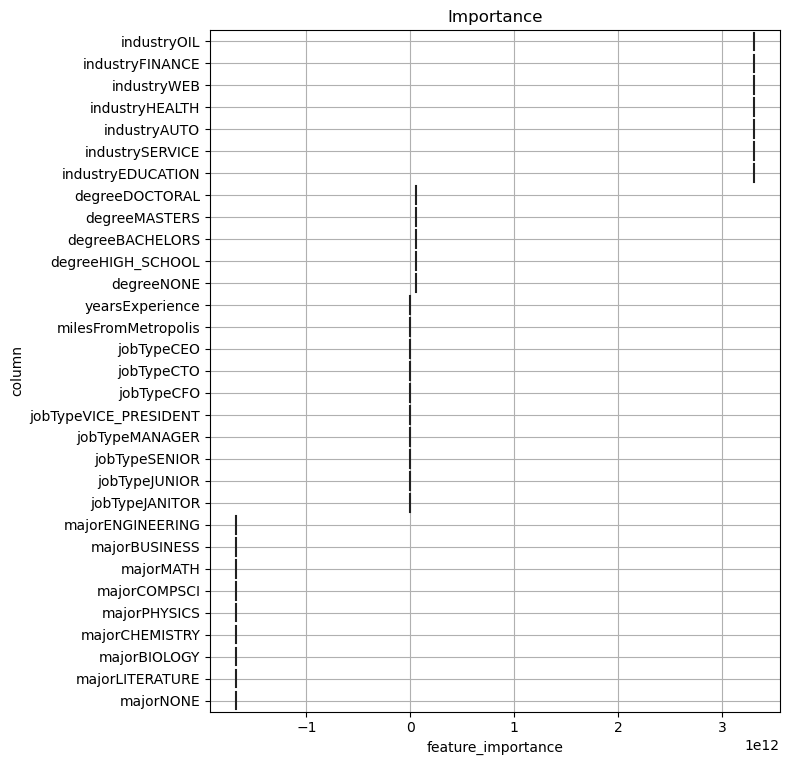

In [322]:
%%time
import time
# Fit a Linear Regression Model to the train dataset

from sklearn.linear_model import LinearRegression

lModel = LinearRegression()
lModel.fit(X_train, Y_train)

# Print score of the model
print_score(lModel)

#lModel_array = [lModel.coef_[0], lModel.coef_[1]]

#Visualizing the imporance of features
fig, ax = visualize_importance(lModel.coef_, train_X)



In [316]:
lModel.coef_

array([-6.41830984e+09, -6.41830985e+09, -6.41830985e+09, -6.41830990e+09,
       -6.41830989e+09, -6.41830987e+09, -6.41830988e+09, -6.41830986e+09,
        5.25803320e+10,  5.25803320e+10,  5.25803320e+10,  5.25803320e+10,
        5.25803320e+10, -1.67920059e+12, -1.67920059e+12, -1.67920059e+12,
       -1.67920059e+12, -1.67920059e+12, -1.67920059e+12, -1.67920059e+12,
       -1.67920059e+12, -1.67920059e+12,  3.30854122e+12,  3.30854122e+12,
        3.30854122e+12,  3.30854122e+12,  3.30854122e+12,  3.30854122e+12,
        3.30854122e+12,  4.83110541e+01, -3.95561028e+01])

In [131]:
lModel.coef_[0]

51044900260.69989

 # RANDOM FOREST REGRESSOR

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [324]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [325]:
rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

RandomForestRegressor()

In [327]:
print_score(rf)

RMSE-Train :  20.048000758055885 
 RMSE-Test:  20.589234730701186 
 Score-Train:  0.7318175409950956 
 Score-Test:  0.7175063972375044 
 MedAE-Train:  13.079999999999998 
 MedAE-Test:  13.921666666666667 
 MeanAE-Train 15.817397093074948 
 MeanAE-Test 16.449465107375545


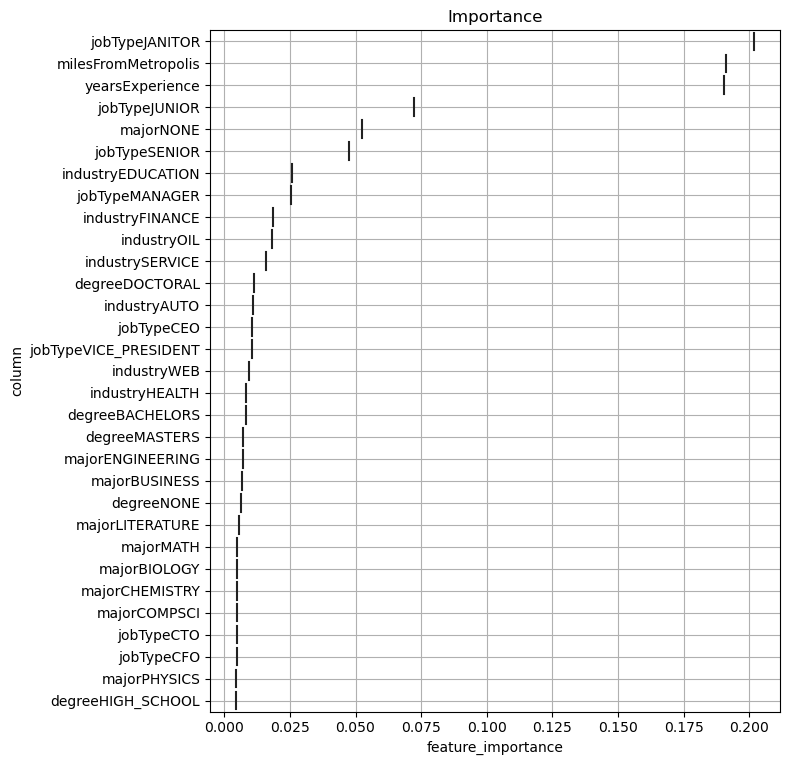

In [336]:
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:500000])

# KNEIGHBORS REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()
knnr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])
#print_score(knnr)

# GRADIENT BOOSTING REGRESSOR

RMSE-Train :  19.434293829810397 
 RMSE-Test:  19.447314596678694 
 Score-Train:  0.7479853674616239 
 Score-Test:  0.7479727577928283 
 MedAE-Train:  13.611852412615633 
 MedAE-Test:  13.650356789965585 
 MeanAE-Train 15.688012666270078 
 MeanAE-Test 15.706232269019692


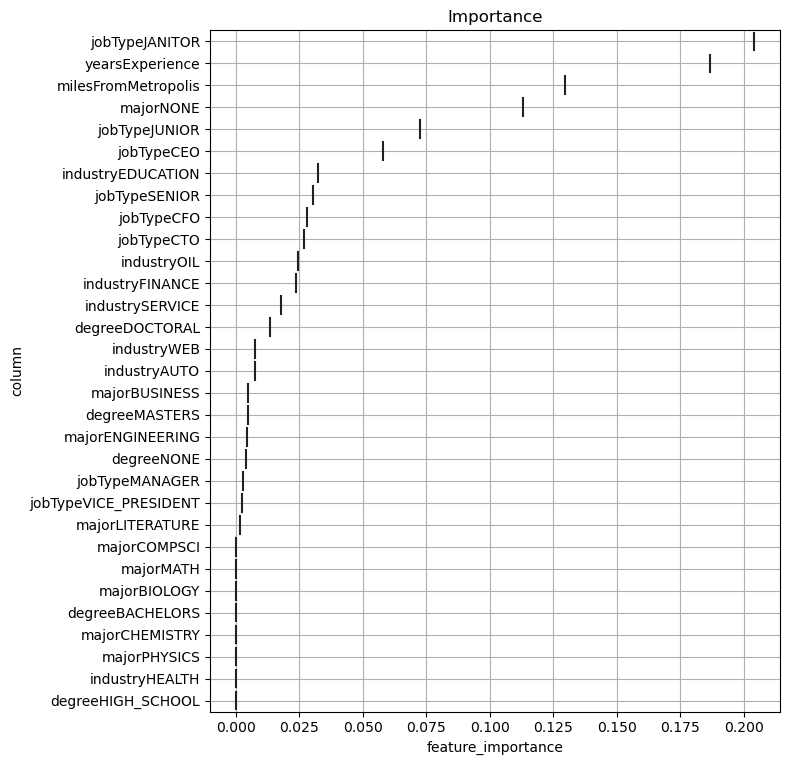

In [339]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(GBR)
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])

# DECISION TREE REGRESSOR

In [340]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(DTR)

RMSE-Train :  26.984188023704004 
 RMSE-Test:  27.833585056246946 
 Score-Train:  0.5141447084642902 
 Score-Test:  0.48374234472357525 
 MedAE-Train:  16.0 
 MedAE-Test:  17.0 
 MeanAE-Train 20.34361645833333 
 MeanAE-Test 21.641949166666667


In [1]:
fig, ax = visualize_importance(DTR.feature_importances_, train_X.iloc[1:50000])

NameError: name 'visualize_importance' is not defined

# ADABOOST REGRESSOR

RMSE-Train :  25.20274409473493 
 RMSE-Test:  25.202430273605806 
 Score-Train:  0.5761776182125409 
 Score-Test:  0.5767343241391159 
 MedAE-Train:  19.262649456768976 
 MedAE-Test:  19.33096446700509 
 MeanAE-Train 20.998989858137392 
 MeanAE-Test 21.02093050462106


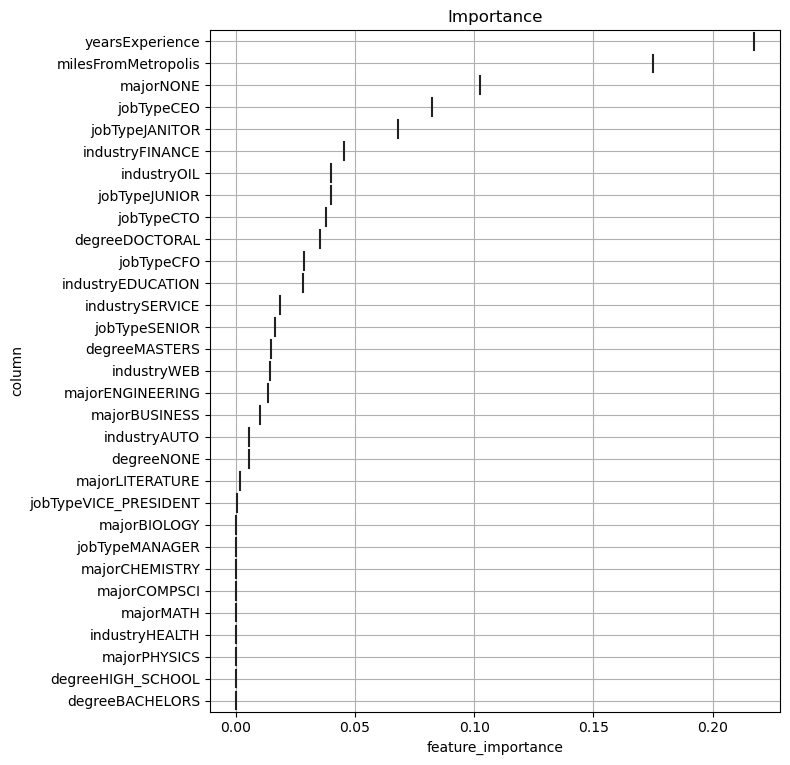

In [337]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(AdaBoost)
fig, ax = visualize_importance(AdaBoost.feature_importances_, train_X.iloc[1:50000])

# XGBOOST REGRESSOR

In [2]:
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor()

In [ ]:
xgbr.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(xgbr)
fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:50000])

# LIGHT GRADIENT BOOSTED MACHINE

In [3]:
import lightgbm as lgbm

In [ ]:
lg = lgbm.LGBMRegressor()

In [ ]:
lg.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(lg)
fig, ax = visualize_importance(lg.feature_importances_, train_X.iloc[1:50000])

# COMPARING ALL THE MODELS BASED ON METRICS

In [341]:
def compare_models(models, names, X_train, y_train, X_test, y_test):
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split
    
    # Create a list with the objects
    
    data = {'Metric' : ['rmse', 'MedAE', 'MAE', 'R-Squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)
    
    def rmse(x, y):
        return math.sqrt(((x-y)**2).mean())
    
    for (model, name) in zip(models, names):
        y_pred = model.predict(X_test)
        res = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train), metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train), metrics.mean_absolute_error(model.predict(X_test), y_test),     
                metrics.r2_score(model.predict(X_train), y_train), metrics.r2_score(model.predict(X_test), y_test)]    
    
        df_train[name] = [res[0], res[2], res[4], res[6]]     
        df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train, df_test

In [342]:
#List of Models and List of names

models = [lModel, DTR, rf]#, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest']#, 'Knn', 'GBR', 'Xboost', 'AdaBoost']
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

# RMSE of all models upon train and test data

In [343]:
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric         Lr      Dtree     Forest
0   rmse  19.606118  26.984188  20.048001


  Metric         Lr      Dtree     Forest
0   rmse  19.614545  27.833585  20.589235


# ALL METRICS ON TRAIN AND TEST DATA

In [344]:
#Comparing the metrics of models for both Training and Testing sets
print('Results of Training set')
print(comp_model_train)
print('Results of Testing set')
comp_model_test

Results of Training set
      Metric         Lr      Dtree     Forest
0       rmse  19.606118  26.984188  20.048001
1      MedAE  13.722900  16.000000  13.080000
2        MAE  15.840372  20.343616  15.817397
3  R-Squared   0.654899   0.524405   0.657793
Results of Testing set


Metric         Lr      Dtree     Forest
0       rmse  19.614545  27.833585  20.589235
1      MedAE  13.747314  17.000000  13.921667
2        MAE  15.862170  21.641949  16.449465
3  R-Squared   0.657170   0.494956   0.638425

# Hyperparameter Tuning

In [345]:
def random_Search(model, X_train, Y_train, param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 20, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
    random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])# Here n_jobs = -1(It means I am telling the algorithm to use all the cores of my processor to do the job.) 
    print(random.best_params_)

In [346]:
# Creating a dictionary of parameters for tuning

rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                'max_features' : ['auto', 'sqrt'],
                'max_depth' : np.linspace(1, 32, 32),
                'min_samples_leaf' : np.linspace(0.1, 0.5, 5),
                'bootstrap' : [True, False]}

# Passing the data for hyperparameter tuning using RandomizedSechCV

random_Search(RandomForestRegressor(), X_train, Y_train, param_grid = rf_para_grid)

# As cv = 3, we will have 3 buckets, each time 1 bucket will be considered as Testing set and 
#remaining 2 buckets will be one Training set. So for 3 times, Training set will 
#fit the model(for 20 different combinations of parameters)
#and generates the predictions.
#By considering all the predictions, Randomized Search CV will give 1 combination of parameters
#as output that yields best results (predictions).

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [347]:
GBR_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                 'max_depth' : np.linspace(1, 32, 32),
                  'min_samples_split' : np.linspace(0.1, 1.0, 10)}
random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid = GBR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [348]:
DTR_para_grid = {
                    'splitter' : ['best', 'random'],
                    'max_depth' : np.linspace(1, 32, 32),
                    'min_samples_leaf' : np.linspace(0.1, 0.5, 5),
                    'min_weight_fraction_leaf' : [0.1, 0.2, 0.5, 0.9],
                    'max_features' : ['auto', 'log2', 'sqrt', None]
}
random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid = DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0}


# USING THESE BEST PARAMETERS AND TRAINING THE MODELS

RMSE-Train :  30.16999118809997 
 RMSE-Test:  30.16356726866284 
 Score-Train:  0.39265061636470766 
 Score-Test:  0.39369156381710324 
 MedAE-Train:  20.6942006269592 
 MedAE-Test:  20.639374726716284 
 MeanAE-Train 24.154543917113422 
 MeanAE-Test 24.146671443605783


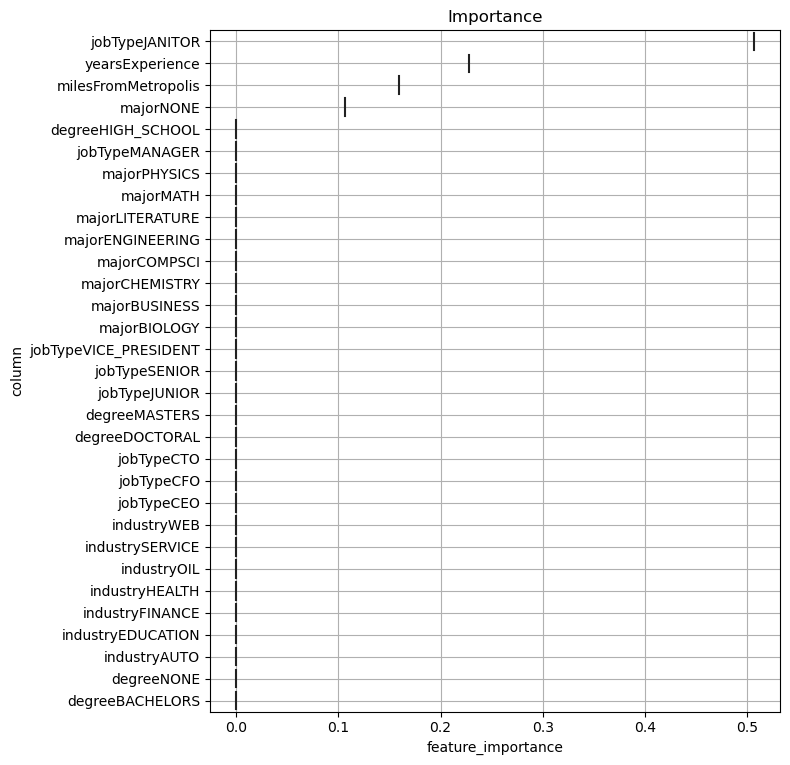

In [349]:
rf = RandomForestRegressor(n_estimators= 64, min_samples_leaf= 0.1, max_features= 'auto', max_depth= 27.0, bootstrap= False)
rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(rf)
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:50000])

RMSE-Train :  19.14693294503058 
 RMSE-Test:  19.164088354602164 
 Score-Train:  0.7553829856681072 
 Score-Test:  0.7552602361801521 
 MedAE-Train:  13.452033272054784 
 MedAE-Test:  13.490392560836888 
 MeanAE-Train 15.507201416272608 
 MeanAE-Test 15.535360245263375


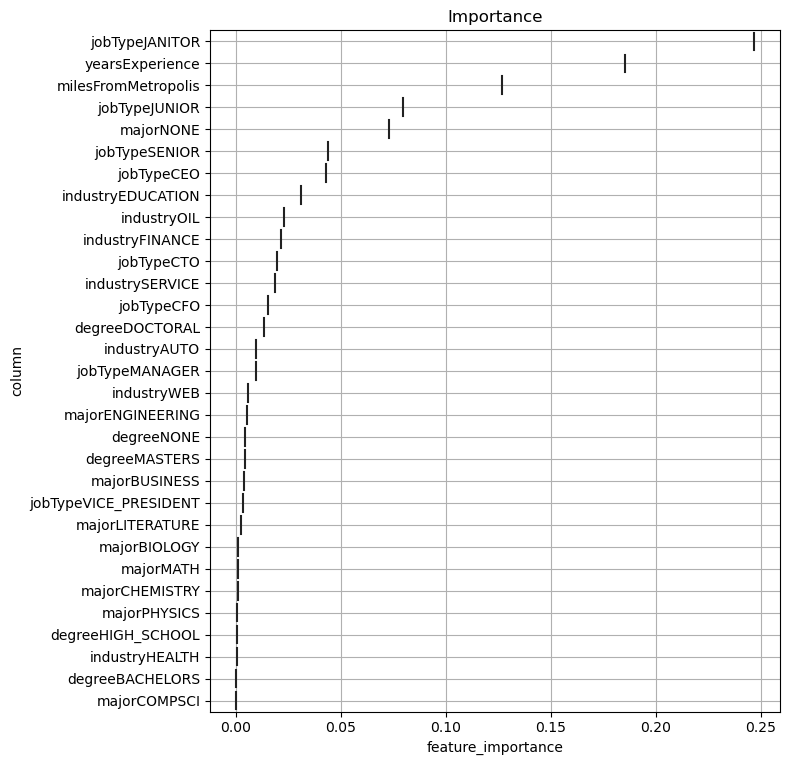

In [350]:
GBR = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25})
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(GBR)
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])

In [351]:
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5.0})
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
print_score(DTR)


RMSE-Train :  35.83901250081325 
 RMSE-Test:  35.82957967695451 
 Score-Train:  0.14296156698512663 
 Score-Test:  0.14451650610688915 
 MedAE-Train:  24.898442835678182 
 MedAE-Test:  24.898442835678182 
 MeanAE-Train 28.76544075459849 
 MeanAE-Test 28.762657049974514


# COMPARING THE METRICS FOR TUNED MODELS

In [352]:
models = [rf, GBR, DTR]
names = ['Forest', 'GradientBoosting', 'Decision Tree']
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

In [353]:
# Metrics for Training set

comp_model_train

Metric     Forest  GradientBoosting  Decision Tree
0       rmse  30.169991         19.146933      35.839013
1      MedAE  20.694201         13.452033      24.898443
2        MAE  24.154544         15.507201      28.765441
3  R-Squared  -0.533893          0.680058      -4.757954

In [354]:
comp_model_test

Metric     Forest  GradientBoosting  Decision Tree
0       rmse  30.163567         19.164088      35.829580
1      MedAE  20.639375         13.490393      24.898443
2        MAE  24.146671         15.535360      28.762657
3  R-Squared  -0.533693          0.680985      -4.756514

# FINALLY, WORKING THE PROVIDED TEST SET

In [362]:
test_X = test_data
test_X.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [363]:
# Passing test data for scaling 
col_test = ['yearsExperience', 'milesFromMetropolis']
test_X = scale_data(test_X, col_test)

In [364]:
test_X.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [365]:
encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType', 'degree', 'major', 'industry'], axis =1)
test_drop.head(1)


jobId companyId  yearsExperience  milesFromMetropolis
0  JOB1362685407687    COMP33         0.916667             0.737374

In [366]:
test_X = encoder.fit_transform(test_X.drop(['jobId', 'companyId', 'yearsExperience', 'milesFromMetropolis'], axis = 1))
test_X.head(1)



<class 'list'>


jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorMATH  majorNONE  majorPHYSICS  industryAUTO  \
0             0.0  ...        0.0        1.0           0.0           0.0   

   industryEDUCATION  industryFINANCE  industryHEALTH  industryOIL  \
0                0.0              0.0             1.0          0.0   

   industrySERVICE  industryWEB  
0              0.0          0.0  

[1 rows x 29 columns]

In [367]:
test_X = test_X.join(test_drop['yearsExperience'])
test_X.head(1)

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorNONE  majorPHYSICS  industryAUTO  \
0             0.0  ...        1.0           0.0           0.0   

   industryEDUCATION  industryFINANCE  industryHEALTH  industryOIL  \
0                0.0              0.0             1.0          0.0   

   industrySERVICE  industryWEB  yearsExperience  
0              0.0          0.0         0.916667  

[1 rows x 30 columns]

In [368]:
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head(1)

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  

[1 rows x 31 columns]


# PREDICTIONS MADE FOR ALL REGRESSORS

In [ ]:
# Just keep changing the regressor for obtaining the predictions of all regressors.
y_predicted = GBR.predict(test_X)
y_predicted

In [ ]:
predictions = pd.DataFrame(y_predicted, columns = ['salarypredictions'])
predictions.head(5)

In [ ]:
y1 = DTR.predict(test_X)
y1

In [ ]:
p1 = pd.DataFrame(y1, columns = ['salarypredictions'])
p1.head(5)

In [ ]:
y2 = rf.predict(test_X)
y2

In [ ]:
p2 = pd.DataFrame(y2, columns = ['salarypredictions'])
p2.head(5)